# OESON Phyton Project
---------------------------------------------------------------------------------------------------------------------------
## Project description 
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study. In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

## Import libraries

In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #supress warnings


## Import data set

In [187]:
#read data from previous_application.csv file
previous_application=pd.read_csv("C:\\Users\\dell\\OneDrive\Desktop\\Data Analysis with Python for Excel Course\\OESON_Python_Risk_Analytics_Project\\previous_application.csv")

In [188]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [189]:
#The number of rows and columns in the data set previous_application
previous_application.shape

(1670214, 37)

In [190]:
previous_application.size

61797918

In [191]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [192]:
previous_application.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

In [193]:
#read data from application_data.csv file
application_data=pd.read_csv("C:\\Users\\dell\\OneDrive\Desktop\\Data Analysis with Python for Excel Course\\OESON_Python_Risk_Analytics_Project\\application_data.csv")

In [194]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [195]:
#The number of rows and columns in the data set application_data
application_data.shape

(307511, 122)

In [196]:
application_data.size

37516342

In [197]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [198]:
application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

## Data cleaning

### previous_application data set

In [199]:
#finding number of missing values in each column
previous_application.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [200]:
#finding % of missing values in each column
previous_application.isna().mean().round(2)*100

SK_ID_PREV                       0.0
SK_ID_CURR                       0.0
NAME_CONTRACT_TYPE               0.0
AMT_ANNUITY                     22.0
AMT_APPLICATION                  0.0
AMT_CREDIT                       0.0
AMT_DOWN_PAYMENT                54.0
AMT_GOODS_PRICE                 23.0
WEEKDAY_APPR_PROCESS_START       0.0
HOUR_APPR_PROCESS_START          0.0
FLAG_LAST_APPL_PER_CONTRACT      0.0
NFLAG_LAST_APPL_IN_DAY           0.0
RATE_DOWN_PAYMENT               54.0
RATE_INTEREST_PRIMARY          100.0
RATE_INTEREST_PRIVILEGED       100.0
NAME_CASH_LOAN_PURPOSE           0.0
NAME_CONTRACT_STATUS             0.0
DAYS_DECISION                    0.0
NAME_PAYMENT_TYPE                0.0
CODE_REJECT_REASON               0.0
NAME_TYPE_SUITE                 49.0
NAME_CLIENT_TYPE                 0.0
NAME_GOODS_CATEGORY              0.0
NAME_PORTFOLIO                   0.0
NAME_PRODUCT_TYPE                0.0
CHANNEL_TYPE                     0.0
SELLERPLACE_AREA                 0.0
N

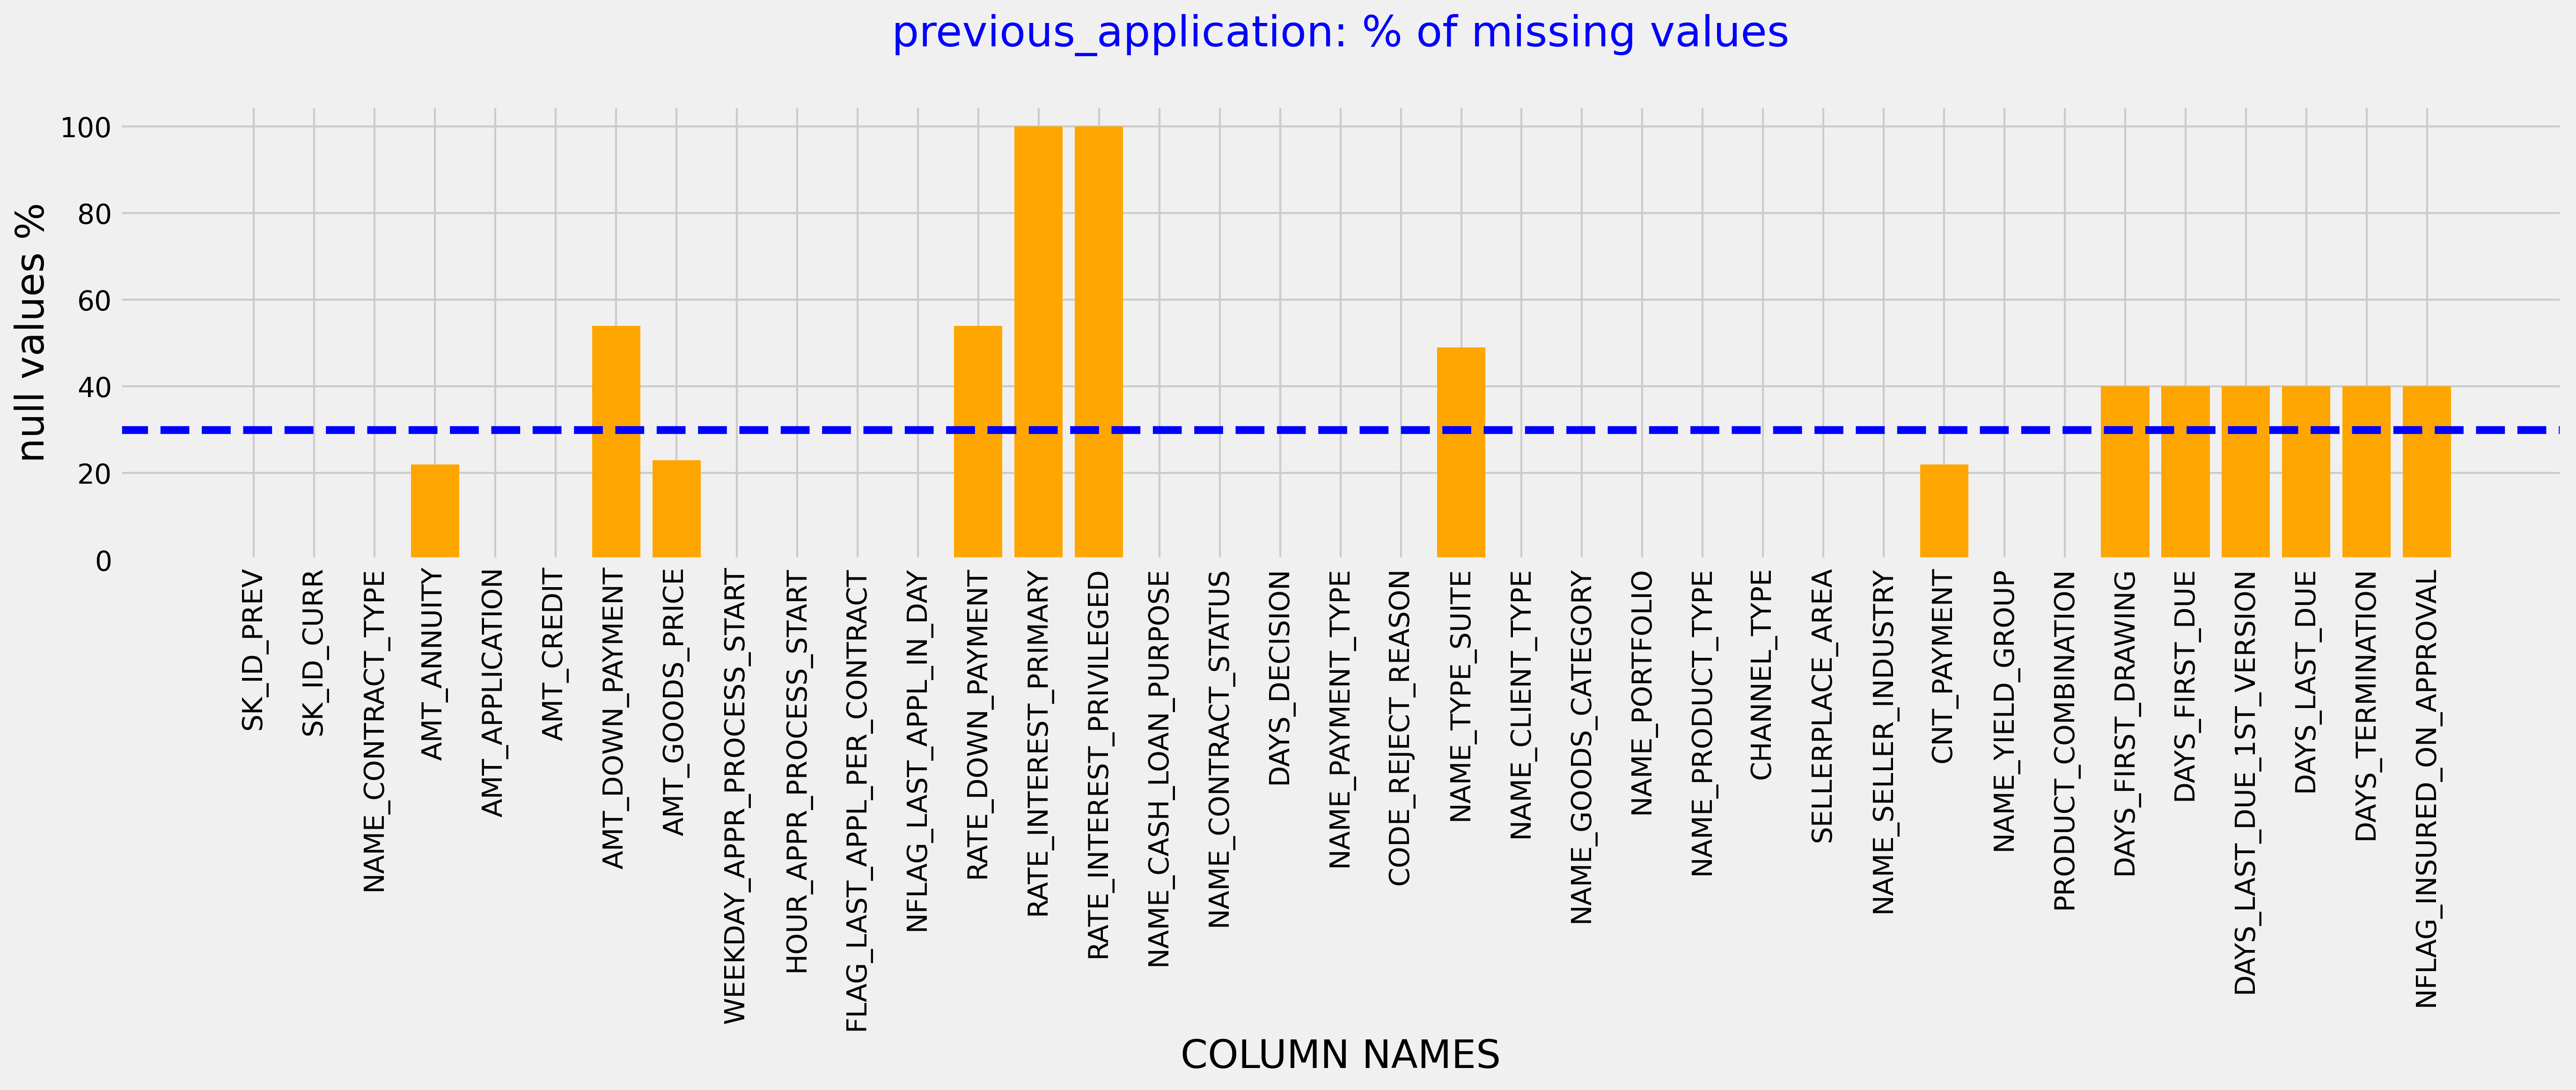

In [201]:
#plotting bar chart of % of missing values in each column
null_prev_data=pd.DataFrame((previous_application.isna().mean().round(2)*100)).reset_index()
null_prev_data.columns=['column name','% of null values']
fig=plt.figure(figsize=(20,4),dpi=300)
col_name=null_prev_data['column name']
per_null_value=null_prev_data['% of null values']
plt.bar(col_name,per_null_value,color='orange')
plt.xlabel("COLUMN NAMES")
plt.ylabel("null values %")
plt.xticks(range(len(col_name)),col_name,rotation='vertical')
plt.axhline(30, ls='--',color='blue')
plt.title('previous_application: % of missing values',color='blue')
plt.show()

In [202]:
# DROPPING COLUMNS WITH >30% NULL VALUES
#--------------------------------------------------------------------------------------------------------------------------

In [203]:
#filtering rows with >30% null values
null_30_per=null_prev_data[null_prev_data['% of null values']>=30]
null_30_per
#number of columns to drop
len(null_30_per)

11

In [204]:
cols_to_drop=null_30_per['column name'].tolist()
previous_application.drop(labels=cols_to_drop,axis=1,inplace=True)

In [205]:
#The number of rows and columns of the data set previous_application after droping columns with >30% null values
previous_application.shape

(1670214, 26)

In [206]:
#all columns of the data set previous_application with >30% null values have been dropped
previous_application.isna().mean().round(2)*100

SK_ID_PREV                      0.0
SK_ID_CURR                      0.0
NAME_CONTRACT_TYPE              0.0
AMT_ANNUITY                    22.0
AMT_APPLICATION                 0.0
AMT_CREDIT                      0.0
AMT_GOODS_PRICE                23.0
WEEKDAY_APPR_PROCESS_START      0.0
HOUR_APPR_PROCESS_START         0.0
FLAG_LAST_APPL_PER_CONTRACT     0.0
NFLAG_LAST_APPL_IN_DAY          0.0
NAME_CASH_LOAN_PURPOSE          0.0
NAME_CONTRACT_STATUS            0.0
DAYS_DECISION                   0.0
NAME_PAYMENT_TYPE               0.0
CODE_REJECT_REASON              0.0
NAME_CLIENT_TYPE                0.0
NAME_GOODS_CATEGORY             0.0
NAME_PORTFOLIO                  0.0
NAME_PRODUCT_TYPE               0.0
CHANNEL_TYPE                    0.0
SELLERPLACE_AREA                0.0
NAME_SELLER_INDUSTRY            0.0
CNT_PAYMENT                    22.0
NAME_YIELD_GROUP                0.0
PRODUCT_COMBINATION             0.0
dtype: float64

In [207]:
#deleting other columns unnecessary for analysis
unnecessary_cols=['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY',
                 'SELLERPLACE_AREA','NAME_SELLER_INDUSTRY']
previous_application.drop(labels=unnecessary_cols,axis=1,inplace=True)

In [208]:
previous_application.isna().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY               372235
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE           385515
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
CNT_PAYMENT               372230
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION          346
dtype: int64

In [209]:
# IMPUTING NULL VALUES*
#--------------------------------------------------------------------------------------------------------------------------
# *AMT_CREDIT and PRODUCT_COMBINATION have few null values. We can ignore this as the percentage is very low
# AMT_ANNUITY, AMT_GOODS_PRICE and  CNT_PAYMENT columns have significant number of null values, 
# we analyse them before inputing null values

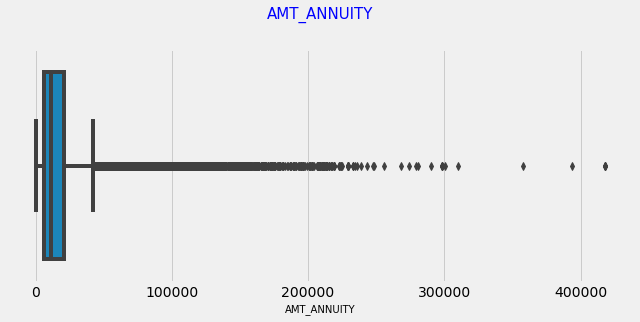

In [210]:
#Analyzing AMT_ANNUITY column with the box plot
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,4))
sns.boxplot(previous_application.AMT_ANNUITY)
plt.title("AMT_ANNUITY",color='blue',fontsize=15)
plt.xlabel('AMT_ANNUITY',fontsize=10)
plt.show()

In [211]:
previous_application['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [212]:
#Imputing the null values with median as mean is affected by outliers and it would not be the right approach
previous_application['AMT_ANNUITY'].fillna(previous_application['AMT_ANNUITY'].median(),inplace=True)

In [213]:
previous_application['AMT_ANNUITY'].isna().sum()

0

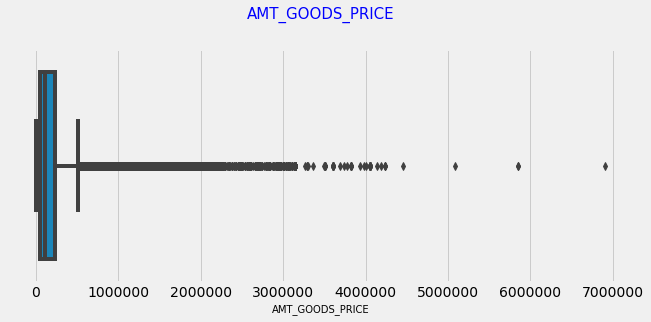

In [214]:
#Analyzing AMT_GOODS_PRICE column with the box plot
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,4))
sns.boxplot(previous_application.AMT_GOODS_PRICE)
plt.title("AMT_GOODS_PRICE",color='blue',fontsize=15)
plt.xlabel('AMT_GOODS_PRICE',fontsize=10)
plt.ticklabel_format(useOffset=False, style='plain', axis='x')
plt.show()

In [215]:
#Imputing the null values with median as mean is affected by outliers and it would not be the right approach
previous_application['AMT_GOODS_PRICE'].fillna(previous_application['AMT_GOODS_PRICE'].median(),inplace=True)

In [216]:
previous_application['AMT_GOODS_PRICE'].isna().sum()

0

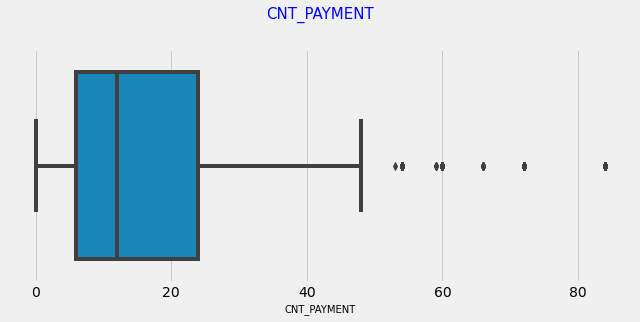

In [217]:
#Analyzing CNT_PAYMENT column with the box plot
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,4))
sns.boxplot(previous_application.CNT_PAYMENT)
plt.title("CNT_PAYMENT",color='blue',fontsize=15)
plt.xlabel('CNT_PAYMENT',fontsize=10)
plt.show()

In [218]:
#Imputing the null values with median as mean is affected by outliers and it would not be the right approach
previous_application['CNT_PAYMENT'].fillna(previous_application['CNT_PAYMENT'].median(),inplace=True)

In [219]:
previous_application['CNT_PAYMENT'].isna().sum()

0

In [220]:
#Convert DAYS_DECISION from negative to positive 
previous_application['DAYS_DECISION'] = abs(previous_application['DAYS_DECISION'])

In [221]:
previous_application

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE  \
0                17145.0     17145.0          17145.0                    XAP   
1               607500.0    679671.0         607500.0                    XNA   
2               112500.0    136444.5         112500.0                    XNA   
3               450000.0    470790.0         450000.0                    XNA   
4               337500.0    404055.0         337500.0                Repairs   
...                  ...         ...              ...                    ...   
1670209         267295.5    311400.0         267295.5                    XAP   
1670210          87750.0     64291.5          87750.0                    XAP   
1670211         105237.0    102523.5         105237.0                    XAP   
1670212         180000.0    191880.0         180000.0                    XNA   
1670213         360000.0    360000.0         360000.0                    XNA   

        NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0                   Approved             73  Cash through the bank   
1                   Approved            164                    XNA   
2                   Approved            301  Cash through the bank   
3                   Approved            512  Cash through the bank   
4                    Refused            781  Cash through the bank   
...                      ...            ...                    ...   
1670209             Approved            544  Cash through the bank   
1670210             Approved           1694  Cash through the bank   
1670211             Approved           1488  Cash through the bank   
1670212             Approved           1185  Cash through the bank   
1670213             Approved           1193  Cash through the bank   

        CODE_REJECT_REASON NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY  \
0                      XAP         Repeater                Mobile   
1                      XAP         Repeater                   XNA   
2                      XAP         Repeater                   XNA   
3                      XAP         Repeater                   XNA   
4                       HC         Repeater                   XNA   
...                    ...              ...                   ...   
1670209                XAP        Refreshed             Furniture   
1670210                XAP              New             Furniture   
1670211                XAP         Repeater  Consumer Electronics   
1670212                XAP         Repeater                   XNA   
1670213                XAP         Repeater                   XNA   

        NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  \
0                  POS               XNA             Country-wide   
1                 Cash            x-sell           Contact center   
2                 Cash            x-sell  Credit and cash offices   
3                 Cash            x-sell  Credit and cash offices   
4                 Cash           walk-in  Credit and cash offices   
...                ...               ...                      ...   
1670209            POS               XNA                    Stone   
1670210            PO

In [222]:
#finding the duplicate data
previous_application.duplicated().sum()

0

In [223]:
#The dataset previous_application has no duplicate values

In [224]:
# DATATYPE CONVERSION
#--------------------------------------------------------------------------------------------------------------------------

In [225]:
#Checking the number of unique values in a column to check if it is continuous or categorical column
previous_application.nunique()

SK_ID_PREV                1670214
SK_ID_CURR                 338857
NAME_CONTRACT_TYPE              4
AMT_ANNUITY                357959
AMT_APPLICATION             93885
AMT_CREDIT                  86803
AMT_GOODS_PRICE             93885
NAME_CASH_LOAN_PURPOSE         25
NAME_CONTRACT_STATUS            4
DAYS_DECISION                2922
NAME_PAYMENT_TYPE               4
CODE_REJECT_REASON              9
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            28
NAME_PORTFOLIO                  5
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    8
CNT_PAYMENT                    49
NAME_YIELD_GROUP                5
PRODUCT_COMBINATION            17
dtype: int64

In [226]:
Categorical_col_prev = ['NAME_CONTRACT_TYPE','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                       'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE',
                      'CHANNEL_TYPE','NAME_YIELD_GROUP','PRODUCT_COMBINATION']

for col in Categorical_col_prev:
    previous_application[col] =pd.Categorical(previous_application[col])

In [227]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 20 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1670214 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1670214 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

### application_data data set

In [228]:
#finding number of missing values in each column
application_data.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [229]:
#finding % of missing values in each column
application_data.isna().mean().round(2)*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     14.0
AMT_REQ_CREDIT_BUREAU_WEEK    14.0
AMT_REQ_CREDIT_BUREAU_MON     14.0
AMT_REQ_CREDIT_BUREAU_QRT     14.0
AMT_REQ_CREDIT_BUREAU_YEAR    14.0
Length: 122, dtype: float64

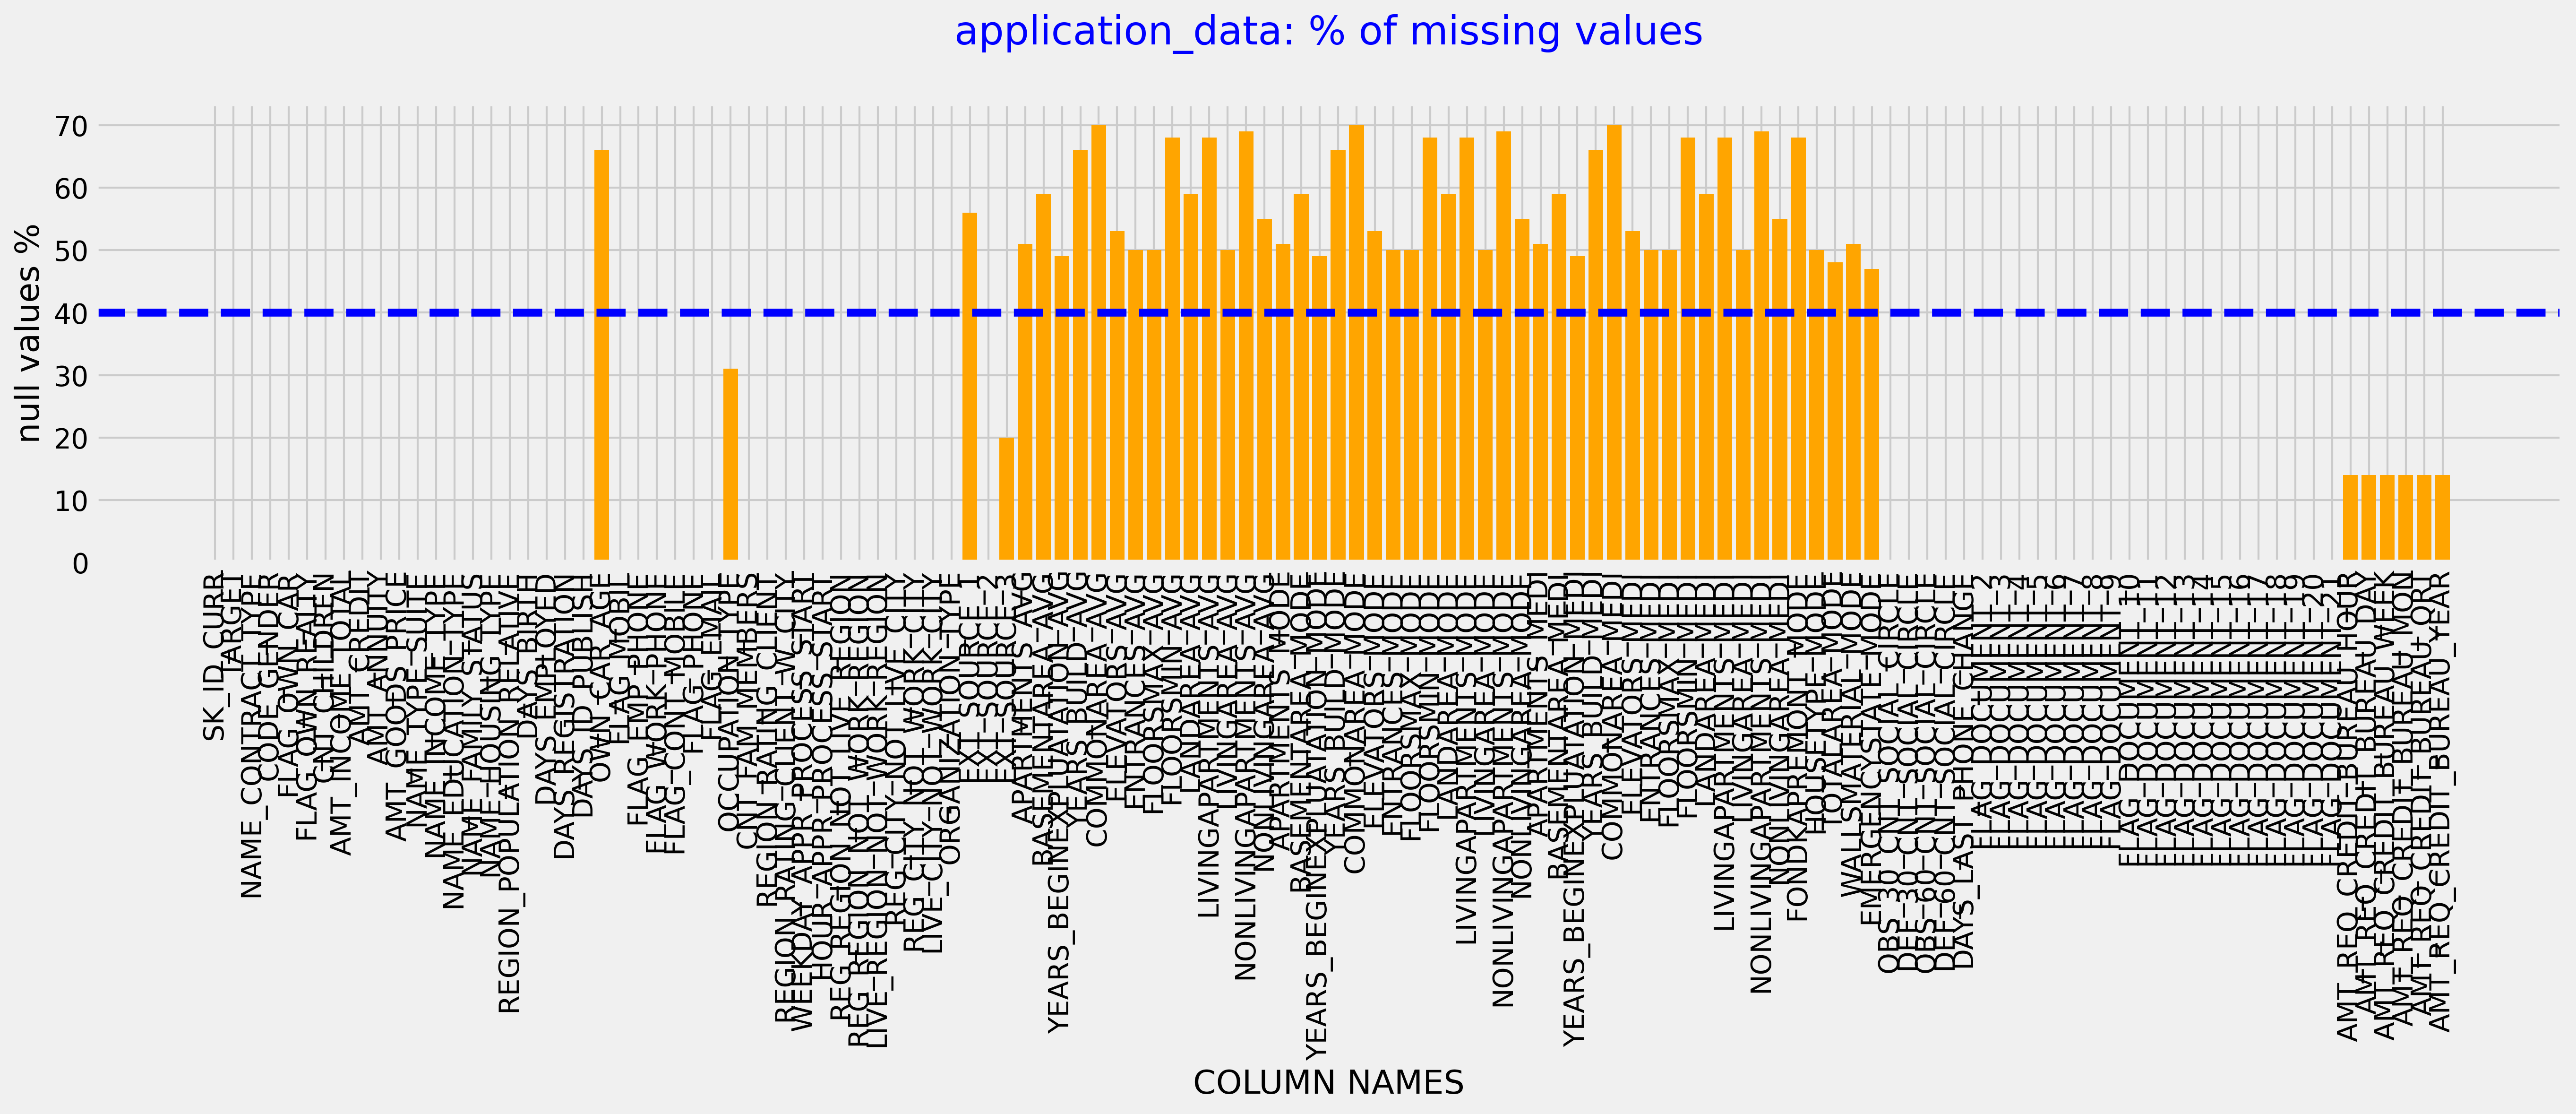

In [230]:
#plotting bar chart of % of missing values in each column
null_app_data=pd.DataFrame((application_data.isna().mean().round(2)*100)).reset_index()
null_app_data.columns=['column name','% of null values']
fig=plt.figure(figsize=(20,4),dpi=300)
col_name=null_app_data['column name']
per_null_val=null_app_data['% of null values']
plt.bar(col_name,per_null_val,color='orange')
plt.xlabel("COLUMN NAMES")
plt.ylabel("null values %")
plt.xticks(range(len(col_name)),col_name,rotation='vertical')
plt.axhline(40, ls='--',color='blue')
plt.title('application_data: % of missing values',color='blue')
plt.show()


In [231]:
# DROPPING COLUMNS WITH >40% NULL VALUES
#--------------------------------------------------------------------------------------------------------------------------

In [232]:
#filtering rows with >40% null values
null_40_per=null_app_data[null_app_data['% of null values']>=40]
null_40_per
#number of columns to drop
len(null_40_per)

49

In [233]:
col_to_drop=null_40_per['column name'].tolist()
application_data.drop(labels=col_to_drop,axis=1,inplace=True)

In [234]:
#The list of columns of the data set application_data after droping columns with >40% null values
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [235]:
#the number of columns of the data set application_data adter droping columns with >40%
application_data.shape

(307511, 73)

In [236]:
#deleting other columns unnecessary for analysis
unnecessary_cols=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','EXT_SOURCE_2', 'EXT_SOURCE_3','FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL']
application_data.drop(labels=unnecessary_cols,axis=1,inplace=True)


In [237]:
application_data.shape

(307511, 45)

In [238]:
application_data.isna().mean().round(2)*100

SK_ID_CURR                      0.0
TARGET                          0.0
NAME_CONTRACT_TYPE              0.0
CODE_GENDER                     0.0
FLAG_OWN_CAR                    0.0
FLAG_OWN_REALTY                 0.0
CNT_CHILDREN                    0.0
AMT_INCOME_TOTAL                0.0
AMT_CREDIT                      0.0
AMT_ANNUITY                     0.0
AMT_GOODS_PRICE                 0.0
NAME_TYPE_SUITE                 0.0
NAME_INCOME_TYPE                0.0
NAME_EDUCATION_TYPE             0.0
NAME_FAMILY_STATUS              0.0
NAME_HOUSING_TYPE               0.0
REGION_POPULATION_RELATIVE      0.0
DAYS_BIRTH                      0.0
DAYS_EMPLOYED                   0.0
DAYS_REGISTRATION               0.0
DAYS_ID_PUBLISH                 0.0
OCCUPATION_TYPE                31.0
CNT_FAM_MEMBERS                 0.0
REGION_RATING_CLIENT            0.0
REGION_RATING_CLIENT_W_CITY     0.0
WEEKDAY_APPR_PROCESS_START      0.0
HOUR_APPR_PROCESS_START         0.0
REG_REGION_NOT_LIVE_REGION  

In [239]:
application_data.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
R

In [240]:
# IMPUTING NULL VALUES*
#--------------------------------------------------------------------------------------------------------------------------
# to the columns: AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, OCCUPATION_TYPE, CNT_SOCIAL_CIRCLE, AMT_REQ_CREDIT_BUREAU
# *CNT_FAM_MEMBERS and DAYS_LAST_PHONE_CHANGE have few null values. We can ignore this as the percentage is very low

In [241]:
# column AMT_ANNUITY
application_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [242]:
#Imputing missing values in AMT_ANNUITY with median value
application_data['AMT_ANNUITY'].fillna(application_data['AMT_ANNUITY'].median(),inplace=True)

In [243]:
application_data['AMT_ANNUITY'].isna().sum()

0

In [244]:
# column AMT_GOODS_PRICE
application_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [245]:
#Imputing missing values in AMT_GOODS_PRICE with median value
application_data['AMT_GOODS_PRICE'].fillna(application_data['AMT_GOODS_PRICE'].median(),inplace=True)

In [246]:
application_data['AMT_GOODS_PRICE'].isna().sum()

0

In [247]:
# column NAME_TYPE_SUITE

In [248]:
application_data['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [249]:
application_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [250]:
# Since the person who accompanied the loan applicant when he was applying for the loan 
# has no relation to ability of the applicant to the loan settlement 
# we will impute the null values in 'NAME_TYPE_SUITE' column with its mode 'Unaccompanied'
application_data['NAME_TYPE_SUITE']=application_data['NAME_TYPE_SUITE'].fillna('Unaccompanied')

In [251]:
application_data['NAME_TYPE_SUITE'].isna().sum()

0

In [252]:
# column OCCUPATION_TYPE
application_data['OCCUPATION_TYPE']=application_data['OCCUPATION_TYPE'].fillna('Occupation unknown')

In [253]:
application_data['OCCUPATION_TYPE'].isna().sum()

0

In [254]:
# columns CNT_SOCIAL_CIRCLE
application_data[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
                  'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].describe()

OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.422245                  0.143421   
std                    2.400989                  0.446698   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  
count             306490.000000             306490.000000  
mean                   1.405292                  0.100049  
std                    2.379803                  0.362291  
min                    0.000000                  0.000000  
25%                    0.000000                  0.000000  
50%                    0.000000                  0.000000  
75%                    2.000000                  0.000000  
max                  344.000000                 24.000000

In [255]:
#Imputing CNT_SOCIAL_CIRCLE with median value
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(application_data['OBS_30_CNT_SOCIAL_CIRCLE'].median(),inplace=True)
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(application_data['DEF_30_CNT_SOCIAL_CIRCLE'].median(),inplace=True)
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(application_data['OBS_60_CNT_SOCIAL_CIRCLE'].median(),inplace=True)
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(application_data['DEF_60_CNT_SOCIAL_CIRCLE'].median(),inplace=True)

In [256]:
application_data[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
                  'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].isna().sum()

OBS_30_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_60_CNT_SOCIAL_CIRCLE    0
dtype: int64

In [257]:
# columns AMT_REQ_CREDIT_BUREAU
application_data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

In [258]:
#Imputing AMT_REQ_CREDIT_BUREAU columns with median value
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].median(),inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_DAY'].median(),inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].median(),inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_QRT'].median(),inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].median(),inplace=True)
application_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(application_data['AMT_REQ_CREDIT_BUREAU_MON'].median(),inplace=True)

In [259]:
application_data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].isna().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

In [260]:
#Converting negative values to positive values in columns which contain days information
application_data['DAYS_BIRTH']=abs(application_data['DAYS_BIRTH'])
application_data['DAYS_EMPLOYED']=abs(application_data['DAYS_EMPLOYED'])
application_data['DAYS_REGISTRATION']=abs(application_data['DAYS_REGISTRATION'])
application_data['DAYS_ID_PUBLISH']=abs(application_data['DAYS_ID_PUBLISH'])

In [261]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE  \
0  ...                       2.0                      2.0   
1  ...                       0.0                      1.0   
2  ...                       0.0                      0.0   
3  ...                       0.0                      2.0   
4  ...                       0.0                      0.0   

  DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE AMT_REQ_CREDIT_BUREAU_HOUR  \
0                      2.0                -1134.0                        0.0   
1                      0.0                 -828.0                        0.0   
2                      0.0                 -815.0                        0.0   
3                      0.0                 -617.0                        0.0   
4                      0.0                -1106.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       0.0                         0.0   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         1.0  
4                         0.0  

[5 rows x 45 columns]

In [262]:
#Finding duplicate data 
application_data.duplicated().sum()

0

In [263]:
#The dataset application_data has no duplicate values

In [264]:
#Checking the number of unique values in a column to check if it is continuous or categorical column
application_data.nunique()

SK_ID_CURR                     307511
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
AMT_GOODS_PRICE                  1002
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
OCCUPATION_TYPE                    19
CNT_FAM_MEMBERS                    17
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
WEEKDAY_APPR_PROCESS_START          7
HOUR_APPR_PR

In [265]:
# BINNING COLUMNS
#--------------------------------------------------------------------------------------------------------------------------

In [266]:
#Binning column AMT_INCOME_TOTAL
application_data['AMT_INCOME_TOTAL'].min()

25650.0

In [267]:
application_data['AMT_INCOME_TOTAL'].max()

117000000.0

In [268]:
bins=[0,50000,100000,150000,200000,application_data['AMT_INCOME_TOTAL'].max()]
labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
application_data['AMT_INCOME_GROUP']=pd.cut(application_data['AMT_INCOME_TOTAL'],bins=bins,labels=labels)

In [269]:
application_data['AMT_INCOME_GROUP'].value_counts()

Medium       91591
Very High    87915
High         64307
Low          59181
Very Low      4517
Name: AMT_INCOME_GROUP, dtype: int64

In [270]:
#Binning column AMT_CREDIT
application_data['AMT_CREDIT'].min()

45000.0

In [271]:
application_data['AMT_CREDIT'].max()

4050000.0

In [272]:
bins=[0,500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000,application_data['AMT_CREDIT'].max()]
labels=['0-5L','5L-10L', '10L-15L', '15L-20L','20L-25L','25L-30L','30L-35L','35L-40L','Above 40L']
application_data['AMT_CREDIT_RANGE']=pd.cut(application_data['AMT_CREDIT'],bins=bins,labels=labels)

In [273]:
application_data['AMT_CREDIT']

0          406597.5
1         1293502.5
2          135000.0
3          312682.5
4          513000.0
            ...    
307506     254700.0
307507     269550.0
307508     677664.0
307509     370107.0
307510     675000.0
Name: AMT_CREDIT, Length: 307511, dtype: float64

In [274]:
application_data['AMT_CREDIT_RANGE'].value_counts()

0-5L         149333
5L-10L       108193
10L-15L       39229
15L-20L        8727
20L-25L        1668
25L-30L         329
30L-35L          18
Above 40L        10
35L-40L           4
Name: AMT_CREDIT_RANGE, dtype: int64

In [275]:
#Creating AGE column from DAYS_BIRTH
application_data['AGE']=application_data['DAYS_BIRTH']//365

In [276]:
#Binning column AGE
application_data['AGE'].min()

20

In [277]:
application_data['AGE'].max()

69

In [278]:
bins=[20,40,60,70]
labels=['Middle Age Adults','Old Adults','Senior Citizens']
application_data['AGE_GROUP']=pd.cut(application_data['AGE'],bins=bins,labels=labels)

In [279]:
application_data['AGE_GROUP'].value_counts()

Old Adults           142220
Middle Age Adults    135922
Senior Citizens       29368
Name: AGE_GROUP, dtype: int64

In [280]:
#creating YEARS_EMPLOYED column from DAYS_EMPLOYED
application_data['YEARS_EMPLOYED']=abs(application_data['DAYS_EMPLOYED']//365)

In [281]:
#Binning YEARS_EMPLOYED
bins=[-1,5,10,15,20,25,30,35,40,application_data['YEARS_EMPLOYED'].max()]
labels=['0-5','5-10', '10-15', '15-20','20-25','25-30','30-35','35-40','Above 40']
application_data['Experience_Range']=pd.cut(application_data['YEARS_EMPLOYED'],bins=bins,labels=labels)

In [282]:
application_data['Experience_Range'].value_counts()

0-5         152538
5-10         55983
Above 40     55549
10-15        22928
15-20         9730
20-25         5465
25-30         2944
30-35         1740
35-40          634
Name: Experience_Range, dtype: int64

In [283]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [284]:
# DATATYPE CONVERSION
#--------------------------------------------------------------------------------------------------------------------------

In [285]:
#Conversion of numerical and object columns into categorical
category_cols = ['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]

for x in category_cols:
    application_data[x] =application_data[x].astype('category')

In [286]:
#Conversion of float64 into int64 columns
int_cols=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
          'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for x in int_cols:
    application_data[x]=application_data[x].astype('int64')

In [287]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  category
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

## Identifying Outliers

### previous_application data set

In [288]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 20 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1670214 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1670214 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

In [289]:
# Function to find outliers using the statistical method IQR (Interquartile Range)

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [290]:
prev_appl_col=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_DECISION','CNT_PAYMENT']


for i in prev_appl_col:
    outliers = find_outliers_IQR(previous_application[i])
    print("\n",i)

    print("number of outliers: "+ str(len(outliers)))

    print("max outlier value: "+ str(outliers.max()))

    print("min outlier value: "+ str(outliers.min()))


 AMT_ANNUITY
number of outliers: 162620
max outlier value: 418058.145
min outlier value: 30739.86

 AMT_APPLICATION
number of outliers: 208019
max outlier value: 6905160.0
min outlier value: 422829.0

 AMT_CREDIT
number of outliers: 179989
max outlier value: 6905160.0
min outlier value: 504814.5

 AMT_GOODS_PRICE
number of outliers: 236035
max outlier value: 6905160.0
min outlier value: 349798.5

 DAYS_DECISION
number of outliers: 17571
max outlier value: 2922
min outlier value: 2831

 CNT_PAYMENT
number of outliers: 344916
max outlier value: 84.0
min outlier value: 0.0


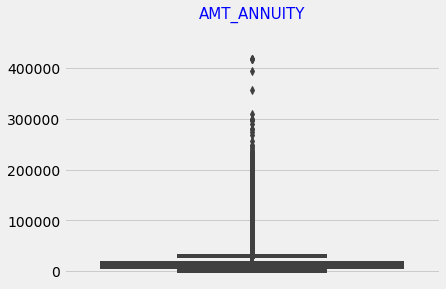

In [291]:
#Visualizing the outliers using boxplot
plt.figure()
sns.boxplot(y=previous_application['AMT_ANNUITY'])
plt.title("AMT_ANNUITY",color='blue',fontsize=15)
plt.ylabel("")
plt.show()

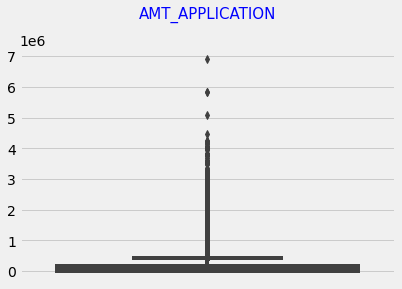

In [292]:
plt.figure()
sns.boxplot(y=previous_application['AMT_APPLICATION'])
plt.title("AMT_APPLICATION",color='blue',fontsize=15)
plt.ylabel("")
plt.show()

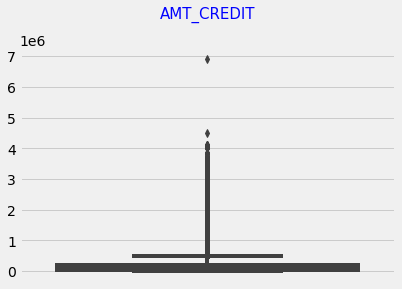

In [293]:
plt.figure()
sns.boxplot(y=previous_application['AMT_CREDIT'])
plt.title("AMT_CREDIT",color='blue',fontsize=15)
plt.ylabel("")
plt.show()

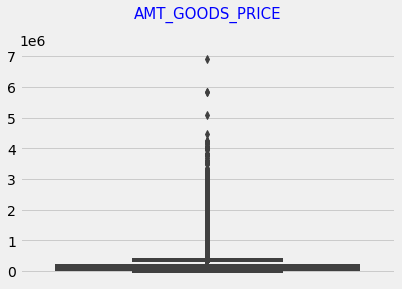

In [294]:
plt.figure()
sns.boxplot(y=previous_application['AMT_GOODS_PRICE'])
plt.title("AMT_GOODS_PRICE",color='blue',fontsize=15)
plt.ylabel("")
plt.show()

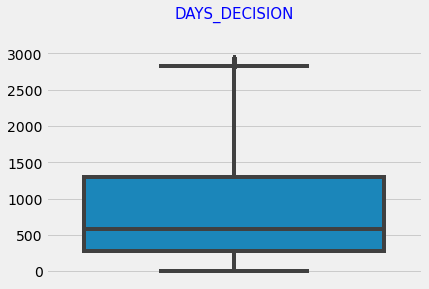

In [295]:
plt.figure()
sns.boxplot(y=previous_application['DAYS_DECISION'])
plt.title("DAYS_DECISION",color='blue',fontsize=15)
plt.ylabel("")
plt.show()

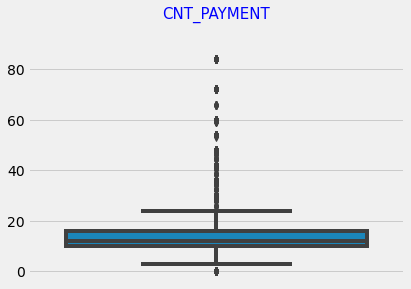

In [296]:
plt.figure()
sns.boxplot(y=previous_application['CNT_PAYMENT'])
plt.title("CNT_PAYMENT",color='blue',fontsize=15)
plt.ylabel("")
plt.show()

**Inference:** <br>
By using both IQR method and by visualizing boxplots we can see that the columns 'AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_DECISION','CNT_PAYMENT' have outliers

### application_data data set

In [297]:
application_data.describe()

SK_ID_CURR   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  307511.000000  307511.000000      3.075110e+05  3.075110e+05   
mean   278180.518577       0.417052      1.687979e+05  5.990260e+05   
std    102790.175348       0.722121      2.371231e+05  4.024908e+05   
min    100002.000000       0.000000      2.565000e+04  4.500000e+04   
25%    189145.500000       0.000000      1.125000e+05  2.700000e+05   
50%    278202.000000       0.000000      1.471500e+05  5.135310e+05   
75%    367142.500000       1.000000      2.025000e+05  8.086500e+05   
max    456255.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  307511.000000     3.075110e+05               307511.000000   
mean    27108.487841     5.383163e+05                    0.020868   
std     14493.461065     3.692890e+05                    0.013831   
min      1615.500000     4.050000e+04                    0.000290   
25%     16524.000000     2.385000e+05                    0.010006   
50%     24903.000000     4.500000e+05                    0.018850   
75%     34596.000000     6.795000e+05                    0.028663   
max    258025.500000     4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  ...  \
count  307511.000000  307511.000000      307511.000000  ...   
mean    16036.995067   67724.742149        4986.120328  ...   
std      4363.988632  139443.751806        3522.886321  ...   
min      7489.000000       0.000000           0.000000  ...   
25%     12413.000000     933.000000        2010.000000  ...   
50%     15750.000000    2219.000000        4504.000000  ...   
75%     19682.000000    5707.000000        7479.500000  ...   
max     25229.000000  365243.000000       24672.000000  ...   

       DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
count             307511.000000           307510.000000   
mean                   0.099717             -962.858788   
std                    0.361735              826.808487   
min                    0.000000            -4292.000000   
25%                    0.000000            -1570.000000   
50%                    0.000000             -757.000000   
75%                    0.000000             -274.000000   
max                   24.000000                0.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               307511.000000              307511.000000   
mean                     0.005538                   0.006055   
std                      0.078014                   0.103037   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               307511.000000              307511.000000   
mean                     0.029723                   0.231293   
std                      0.190728                   0.856810   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR            AGE  \
count              307511.000000               307511.000000  307511.000000   
mean                    0.229631                    1.778463      43.435968   
std                     0.744059                    1.765523      11.954593   
min                     0.000000                    0.000000      20.000000   
25%                     0.000000                    1.000000      34.000000   
50%                 

In [298]:
# Identifying outliers in the following columns:

# 'AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','YEARS_EMPLOYED','CNT_CHILDREN','DAYS_BIRTH'

In [299]:
app_data_cols=['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','YEARS_EMPLOYED','CNT_CHILDREN','DAYS_BIRTH']

for i in app_data_cols:
    outliers = find_outliers_IQR(application_data[i])
    print("\n",i)

    print("number of outliers: "+ str(len(outliers)))

    print("max outlier value: "+ str(outliers.max()))

    print("min outlier value: "+ str(outliers.min()))


 AMT_ANNUITY
number of outliers: 7504
max outlier value: 258025.5
min outlier value: 61708.5

 AMT_INCOME_TOTAL
number of outliers: 14035
max outlier value: 117000000.0
min outlier value: 337545.0

 AMT_CREDIT
number of outliers: 6562
max outlier value: 4050000.0
min outlier value: 1618767.0

 AMT_GOODS_PRICE
number of outliers: 14728
max outlier value: 4050000.0
min outlier value: 1345500.0

 YEARS_EMPLOYED
number of outliers: 56440
max outlier value: 1000
min outlier value: 35

 CNT_CHILDREN
number of outliers: 4272
max outlier value: 19
min outlier value: 3

 DAYS_BIRTH
number of outliers: 0
max outlier value: nan
min outlier value: nan


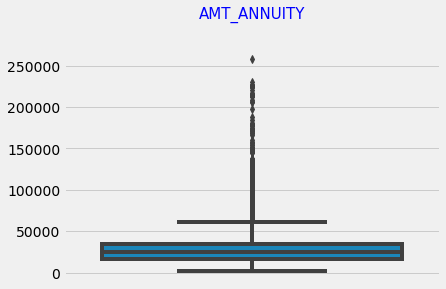

In [300]:
plt.figure()
sns.boxplot(y=application_data['AMT_ANNUITY'])
plt.title("AMT_ANNUITY",color='blue',fontsize=15)
plt.ylabel("")
plt.show()

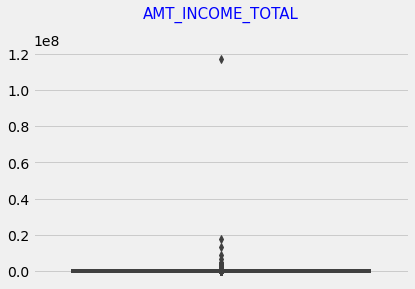

In [301]:
plt.figure()
sns.boxplot(y=application_data['AMT_INCOME_TOTAL'])
plt.title("AMT_INCOME_TOTAL",color='blue',fontsize=15)
plt.ylabel("")
plt.show()

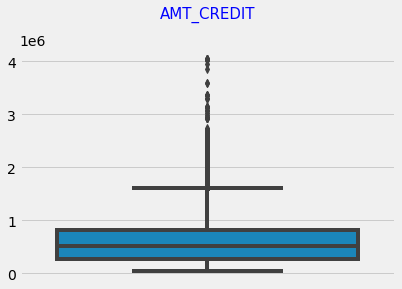

In [302]:
plt.figure()
sns.boxplot(y=application_data['AMT_CREDIT'])
plt.title("AMT_CREDIT",color='blue',fontsize=15)
plt.ylabel("")
plt.show()

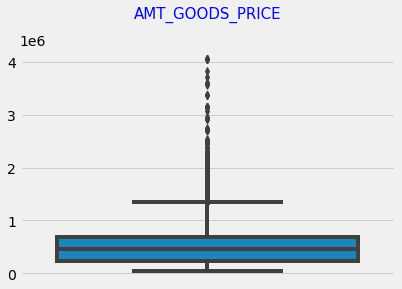

In [303]:
plt.figure()
sns.boxplot(y=application_data['AMT_GOODS_PRICE'])
plt.title("AMT_GOODS_PRICE",color='blue',fontsize=15)
plt.ylabel("")
plt.show()

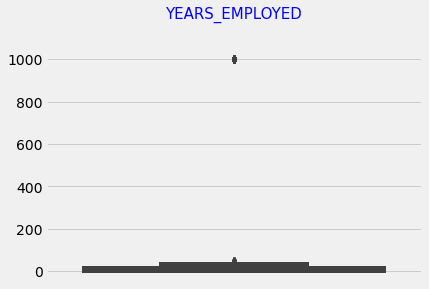

In [304]:
plt.figure()
sns.boxplot(y=application_data['YEARS_EMPLOYED'])
plt.title("YEARS_EMPLOYED",color='blue',fontsize=15)
plt.ylabel("")
plt.show()

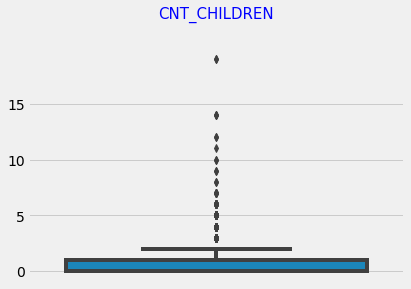

In [305]:
#Visualizing the outliers using boxplot
plt.figure()
sns.boxplot(y=application_data['CNT_CHILDREN'])
plt.title("CNT_CHILDREN",color='blue',fontsize=15)
plt.ylabel("")
plt.show()

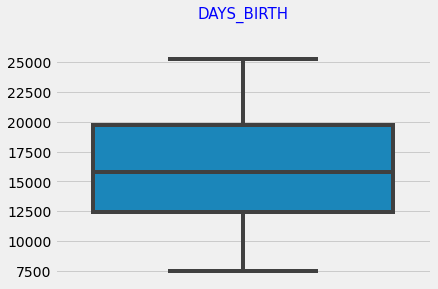

In [306]:
plt.figure()
sns.boxplot(y=application_data['DAYS_BIRTH'])
plt.title("DAYS_BIRTH",color='blue',fontsize=15)
plt.ylabel("")
plt.show()

**Inference:** <br>
- By using both IQR method and by visualizing boxplots we can see that the columns 
 'AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','YEARS_EMPLOYED','CNT_CHILDREN' have outliers.
- We can see that the maximum outlier value for the column CNT_CHILDREN is 19 which is highly unlikely, 
  and the maximum outlier value for YEARS_EMPLOYED is 1000 which is not possible.
- The column DAYS_BIRTH does not have any outliers.

## Data Analysis

### previous_application data set

In [307]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 20 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1670214 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1670214 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

#### Univariate analysis on categorical variables

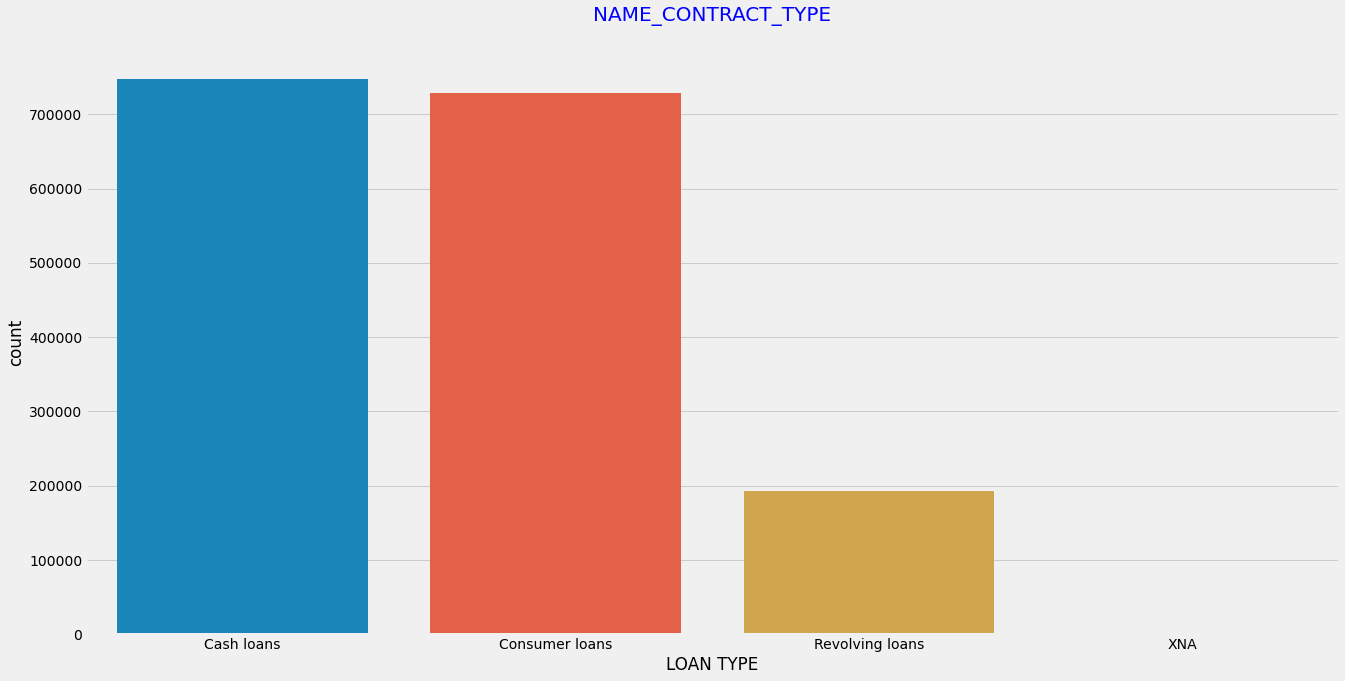

In [308]:
# Analyzing NAME_CONTRACT_TYPE

plt.figure(figsize = [20,10])
sns.countplot(previous_application['NAME_CONTRACT_TYPE'])
plt.title('NAME_CONTRACT_TYPE', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("LOAN TYPE")

plt.show()

Majority of the previous loans are either cash loans or consumer loans.

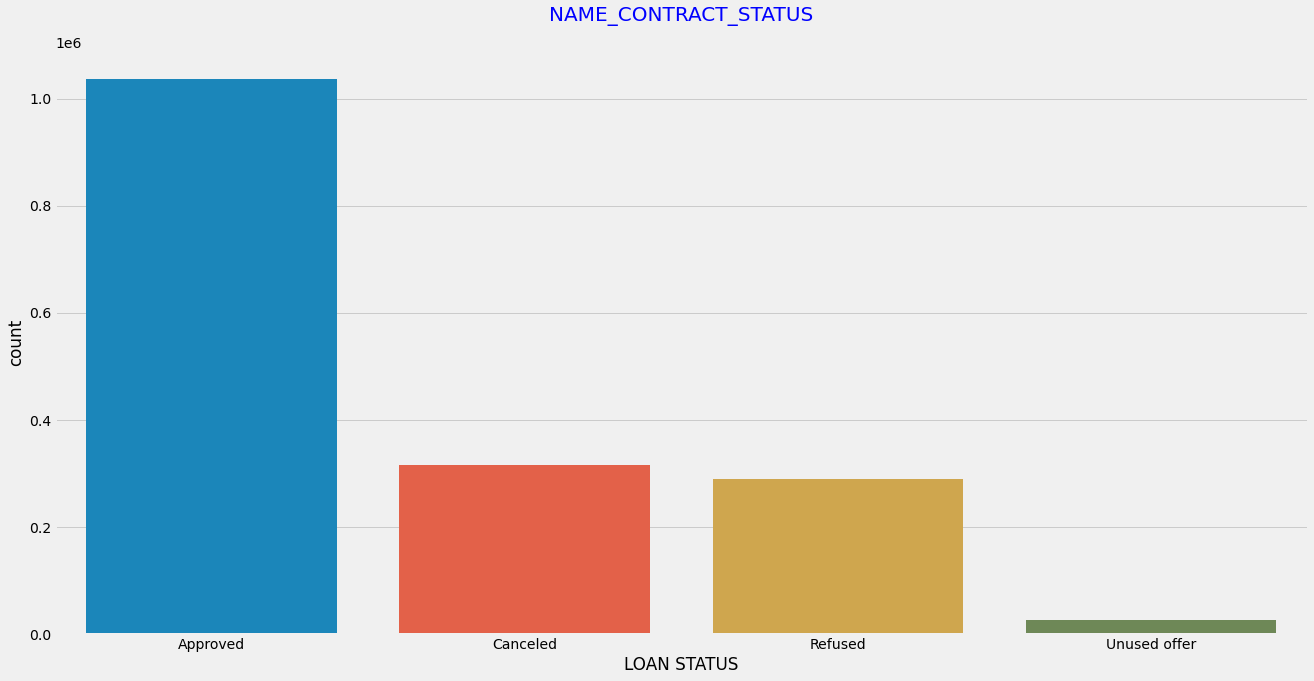

In [309]:
# Analyzing NAME_CONTRACT_STATUS

plt.figure(figsize = [20,10])
sns.countplot(previous_application['NAME_CONTRACT_STATUS'])
plt.title('NAME_CONTRACT_STATUS', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("LOAN STATUS")

plt.show()

Majority of the loan applications were approved.

#### Univariate Analysis on numerical variables

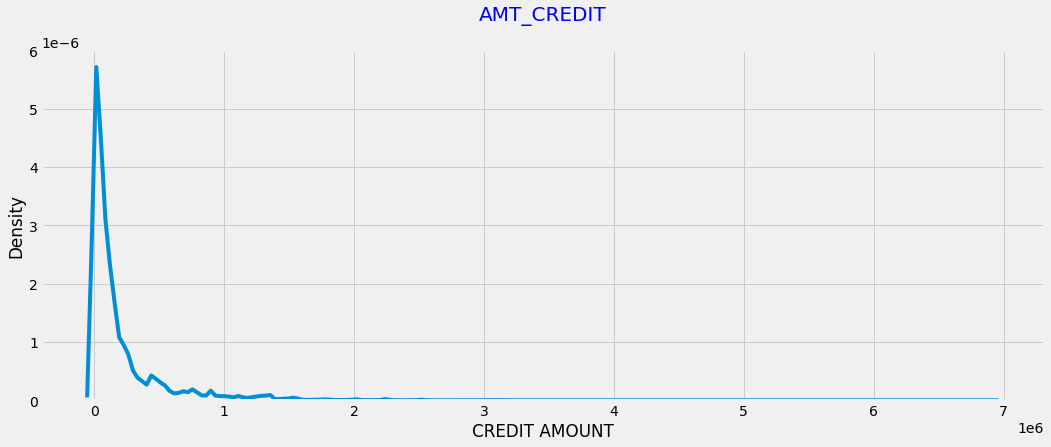

In [310]:
# Analyzing AMT_CREDIT
plt.figure(figsize = [16,6])
sns.distplot(previous_application['AMT_CREDIT'] , hist=False)
plt.title('AMT_CREDIT', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel('CREDIT AMOUNT')
plt.show()

Most of the previous loans have low credit amount

#### Bivariate analysis on categorical variables

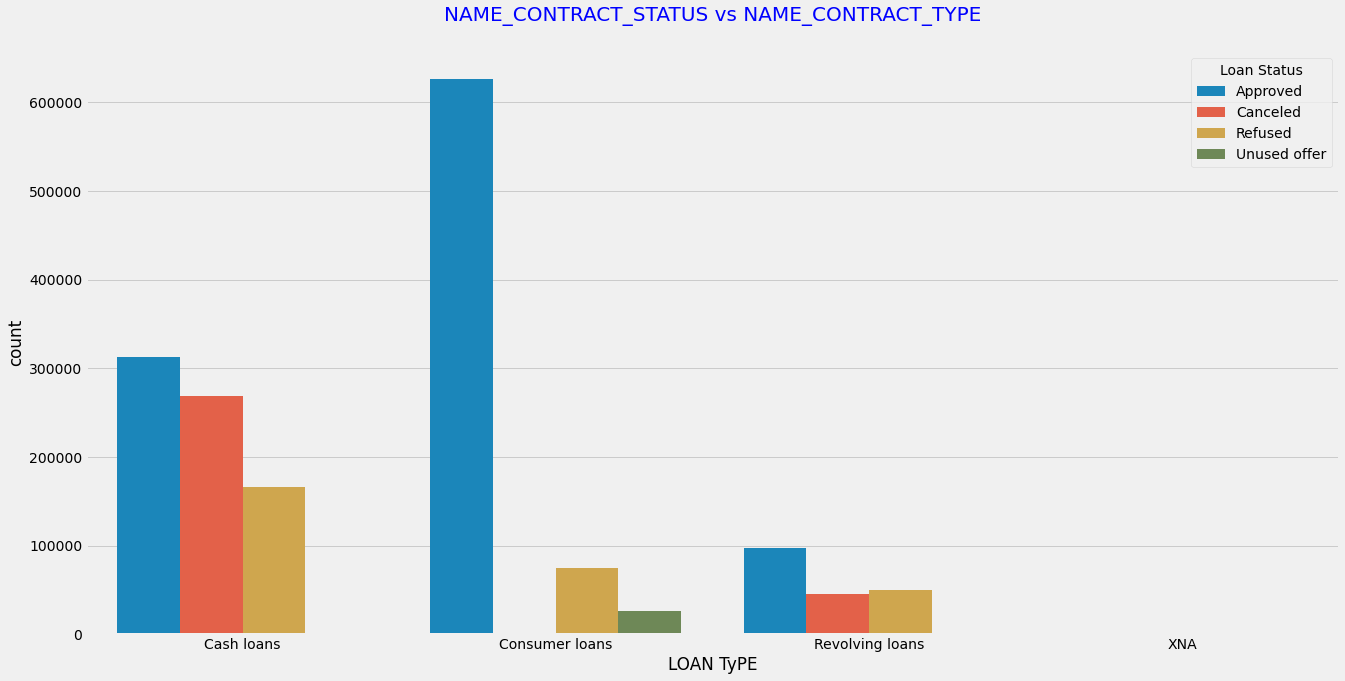

In [311]:
# Analyzing NAME_CONTRACT_STATUS vs NAME_CONTRACT_TYPE

plt.figure(figsize = [20,10])
sns.countplot(previous_application['NAME_CONTRACT_TYPE'], hue=previous_application['NAME_CONTRACT_STATUS'])
plt.title('NAME_CONTRACT_STATUS vs NAME_CONTRACT_TYPE', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("LOAN TyPE")
plt.legend(title='Loan Status', loc='upper right')

plt.show()

Consumer loans have the highest approval rate followed by cash loans and then revolving loans.
Majority of the loans which were refused are cash loans.

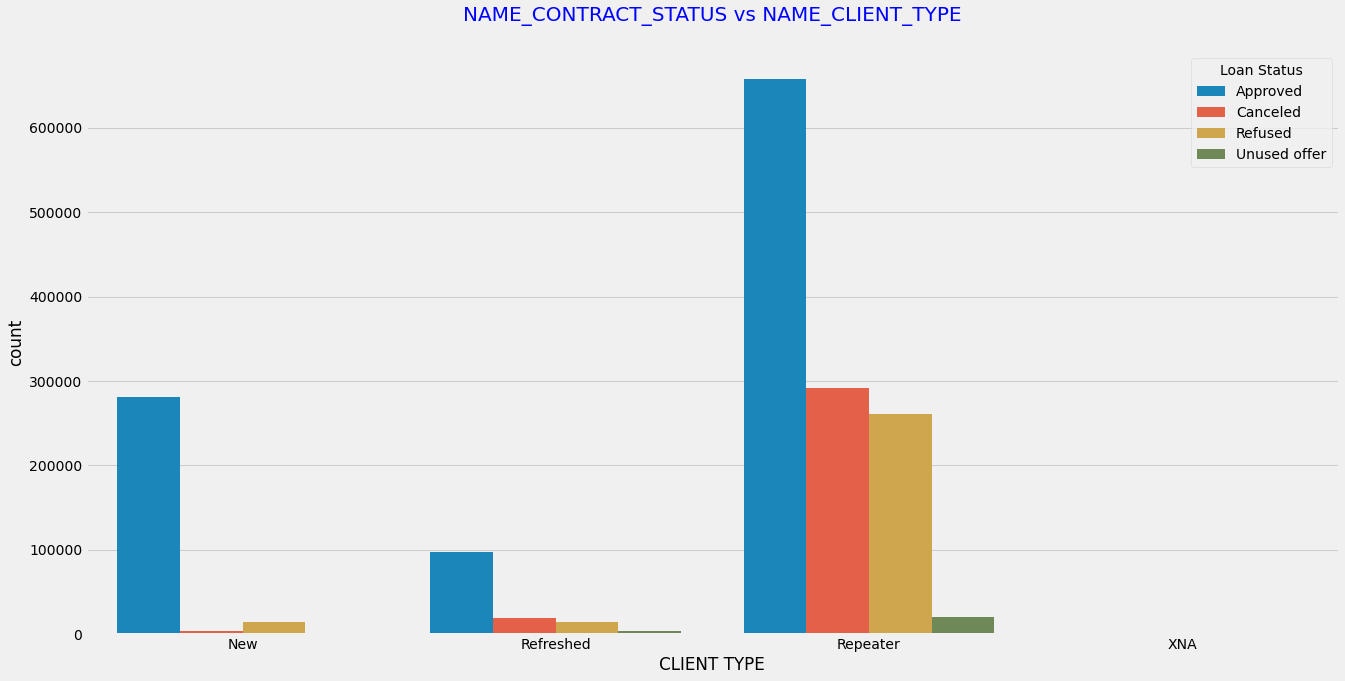

In [312]:
# Analyzing NAME_CONTRACT_STATUS vs NAME_CLIENT_TYPE

plt.figure(figsize = [20,10])
sns.countplot(previous_application['NAME_CLIENT_TYPE'], hue=previous_application['NAME_CONTRACT_STATUS'])
plt.title('NAME_CONTRACT_STATUS vs NAME_CLIENT_TYPE', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("CLIENT TYPE")
plt.legend(title='Loan Status', loc='upper right')

plt.show()

Majority of the applications which were approved are from repeating applicants, followed by new applicants.

#### Correlation

In [313]:
# Top 10 correlation variables 
corr_prev=previous_application.corr()
corr_prev=corr_prev.where(np.triu(np.ones(corr_prev.shape), k=1).astype(np.bool))
corr_prev_df=corr_prev.unstack().reset_index()
corr_prev_df.columns=['VAR1','VAR2','Correlation']
corr_prev_df = round(corr_prev_df.sort_values(by=['Correlation'], ascending=False),2)
corr_prev_df.head(10)

VAR1             VAR2  Correlation
43  AMT_GOODS_PRICE  AMT_APPLICATION         0.99
35       AMT_CREDIT  AMT_APPLICATION         0.98
44  AMT_GOODS_PRICE       AMT_CREDIT         0.97
42  AMT_GOODS_PRICE      AMT_ANNUITY         0.82
34       AMT_CREDIT      AMT_ANNUITY         0.81
26  AMT_APPLICATION      AMT_ANNUITY         0.81
59      CNT_PAYMENT  AMT_APPLICATION         0.68
61      CNT_PAYMENT  AMT_GOODS_PRICE         0.68
60      CNT_PAYMENT       AMT_CREDIT         0.67
58      CNT_PAYMENT      AMT_ANNUITY         0.41

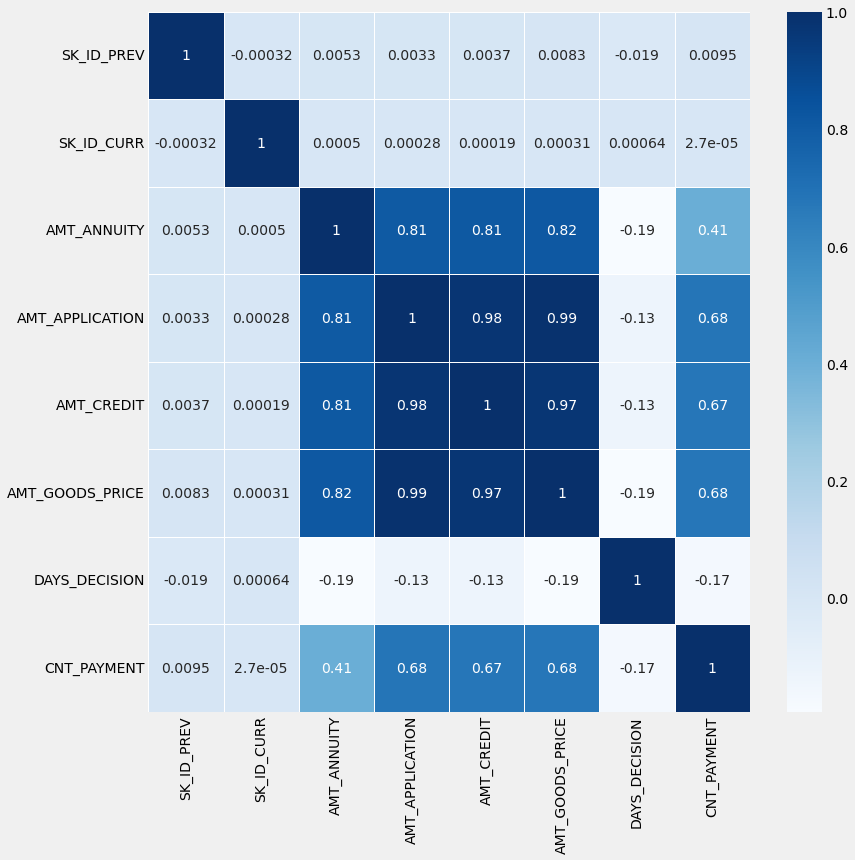

In [314]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(previous_application.corr(), cmap="Blues",annot=True,linewidth =1)

### application_data data set

In [315]:
# Dividing the data into two based on the TARGET variable for comparative analysis

had_difficulties=application_data[application_data['TARGET']==1]
had_no_difficulties=application_data[application_data['TARGET']==0]

In [316]:
had_difficulties.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002      1         Cash loans           M            N   
26      100031      1         Cash loans           F            N   
40      100047      1         Cash loans           M            N   
42      100049      1         Cash loans           F            N   
81      100096      1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    ...  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0   ...                           0                         0   
26  ...                           0                         0   
40  ...                           0                         2   
42  ...                           0                         0   
81  ...                           0                         0   

   AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_GROUP  \
0                          0                          1        Very High   
26                         2                          2           Medium   
40                         0                          4        Very High   
42                         0                          2           Medium   
81                         0                          0              Low   

   AMT_CREDIT_RANGE  AGE          AGE_GROUP  YEARS_EMPLOYED  Experience_Range  
0              0-5L   25  Middle Age Adults               1               0-5  
26           5L-10L   51         Old Adults               7              5-10  
40          10L-15L   47         Old Adults               3               0-5  
42             0-5L   36  Middle Age Adults               9              5-10  
81             0-5L   67    Senior Citizens            1000          Above 40  

[5 rows x 51 columns]

In [317]:
had_no_difficulties.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003      0         Cash loans           F            N   
2      100004      0    Revolving loans           M            Y   
3      100006      0         Cash loans           F            N   
4      100007      0         Cash loans           M            N   
5      100008      0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   ...  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
1  ...                           0                         0   
2  ...                           0                         0   
3  ...                           0                         0   
4  ...                           0                         0   
5  ...                           0                         0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_GROUP  \
1                         0                          0        Very High   
2                         0                          0              Low   
3                         0                          1           Medium   
4                         0                          0           Medium   
5                         1                          1              Low   

  AMT_CREDIT_RANGE  AGE   AGE_GROUP  YEARS_EMPLOYED  Experience_Range  
1          10L-15L   45  Old Adults               3               0-5  
2             0-5L   52  Old Adults               0               0-5  
3             0-5L   52  Old Adults               8              5-10  
4           5L-10L   54  Old Adults               8              5-10  
5             0-5L   46  Old Adults               4               0-5  

[5 rows x 51 columns]

#### Univariate Analysis on categorical variables

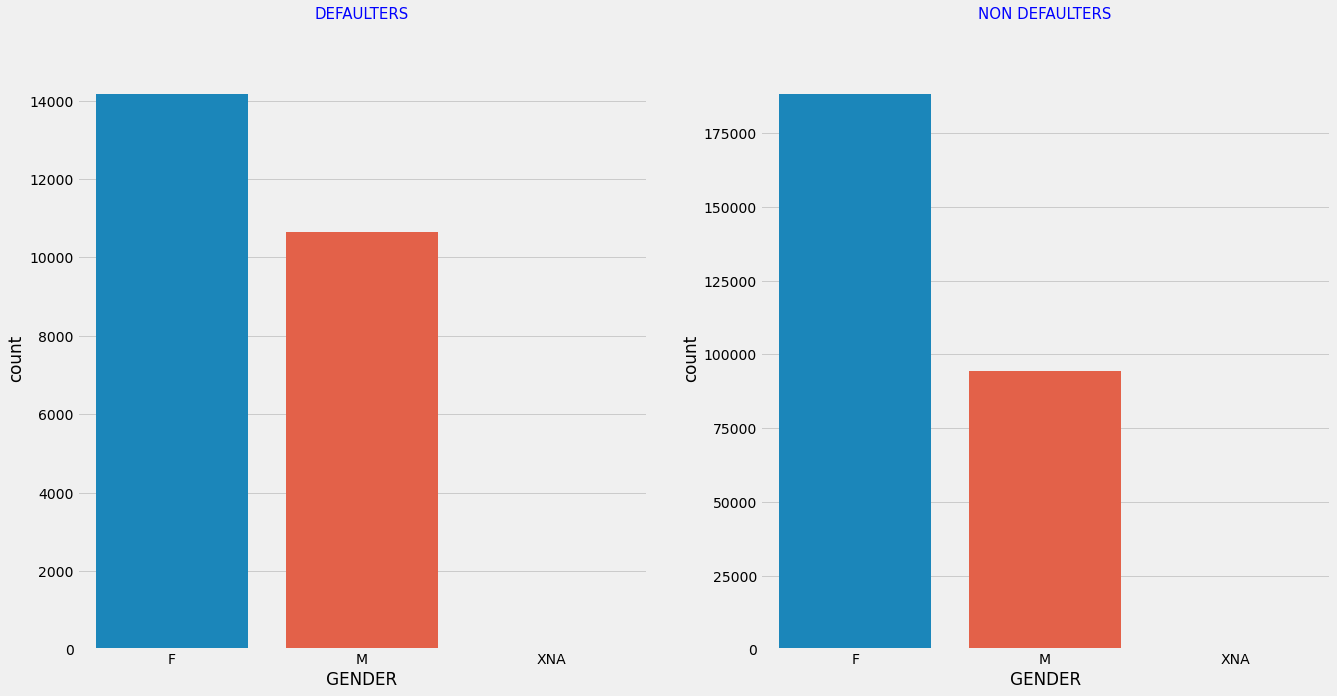

In [318]:
# Analyzing how repayment of loan is affected by gender 
plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
sns.countplot(had_difficulties['CODE_GENDER'])
plt.title('DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("GENDER")

plt.subplot(1,2,2)
sns.countplot(had_no_difficulties['CODE_GENDER'])
plt.title('NON DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("GENDER")

plt.show()

The number of female applicants is greater than male applicants in both defaulters and non defaulters list

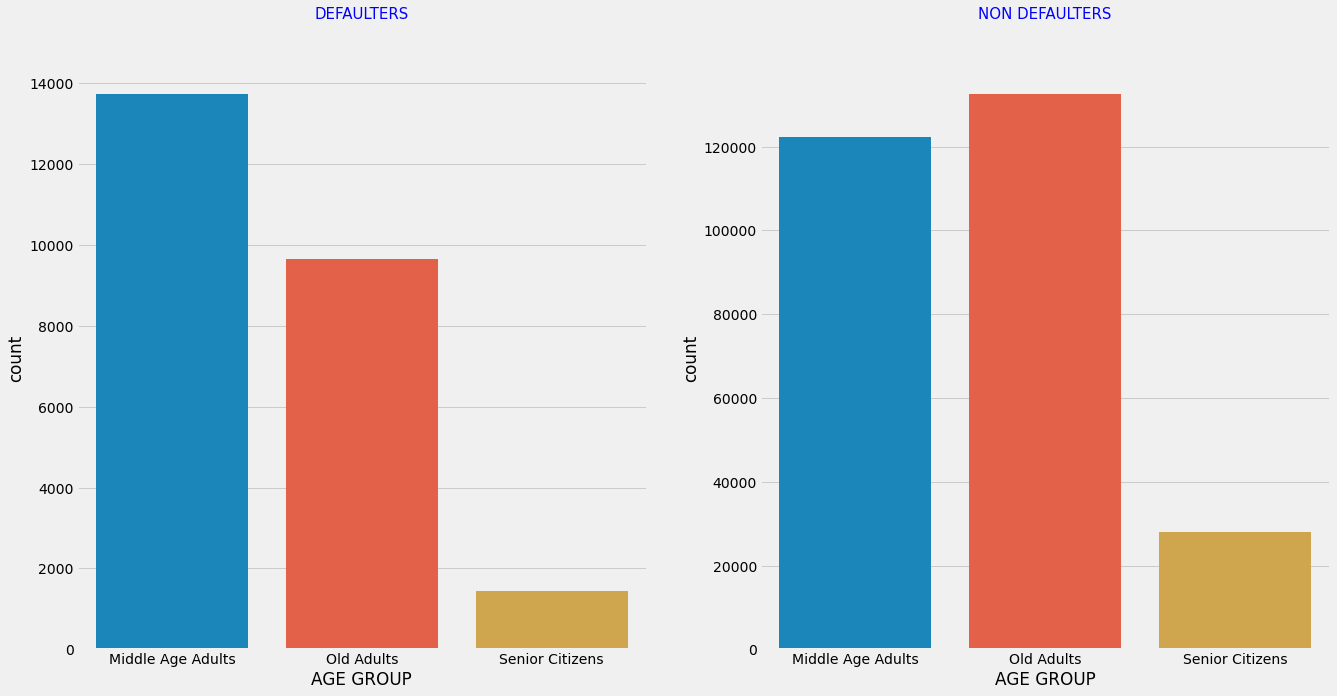

In [319]:
# Analyzing how repayment of loan is affected by age

plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
sns.countplot(had_difficulties['AGE_GROUP'])
plt.title('DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("AGE GROUP")

plt.subplot(1,2,2)
sns.countplot(had_no_difficulties['AGE_GROUP'])
plt.title('NON DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("AGE GROUP")

plt.show()

Middle age adults are likely to default more and Senior citizens are the least to default.

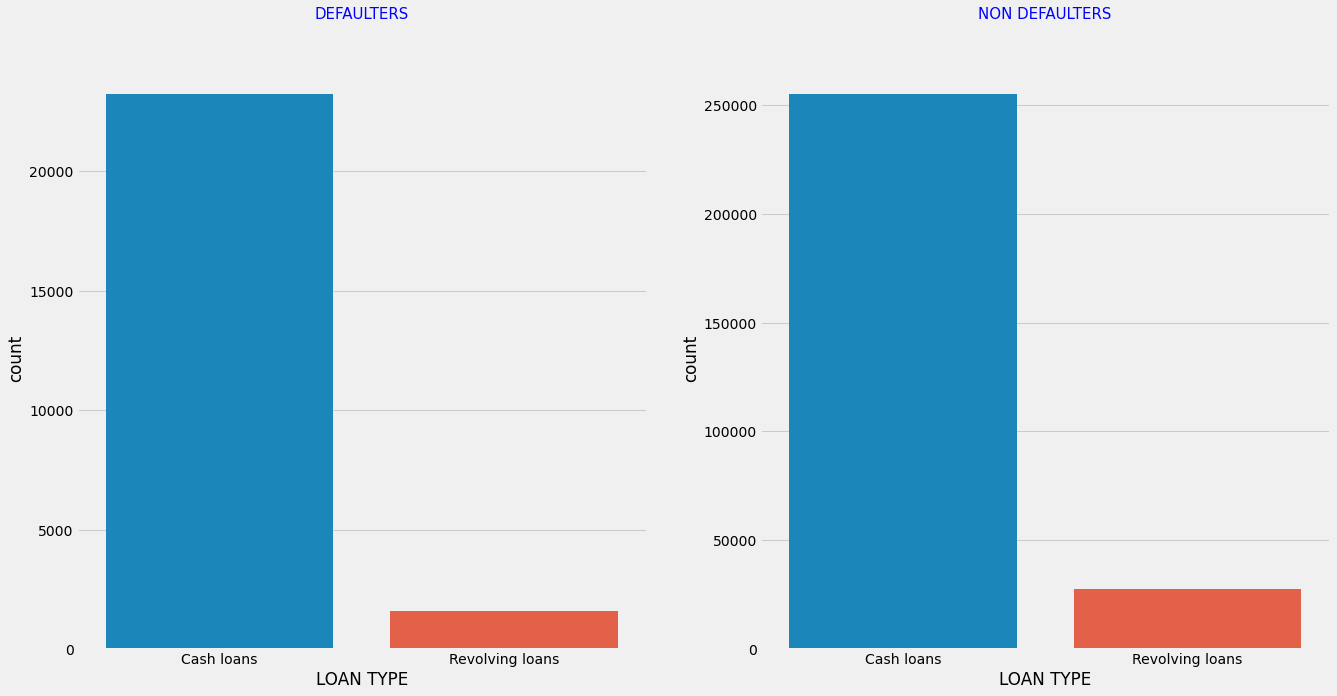

In [320]:
# Analyzing how repayment of loan is affected by loan type

plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
sns.countplot(had_difficulties['NAME_CONTRACT_TYPE'])
plt.title('DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("LOAN TYPE")

plt.subplot(1,2,2)
sns.countplot(had_no_difficulties['NAME_CONTRACT_TYPE'])
plt.title('NON DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("LOAN TYPE")

plt.show()

Both cases seem to follow the same pattern where Cash loans is greater than Revolving loans.

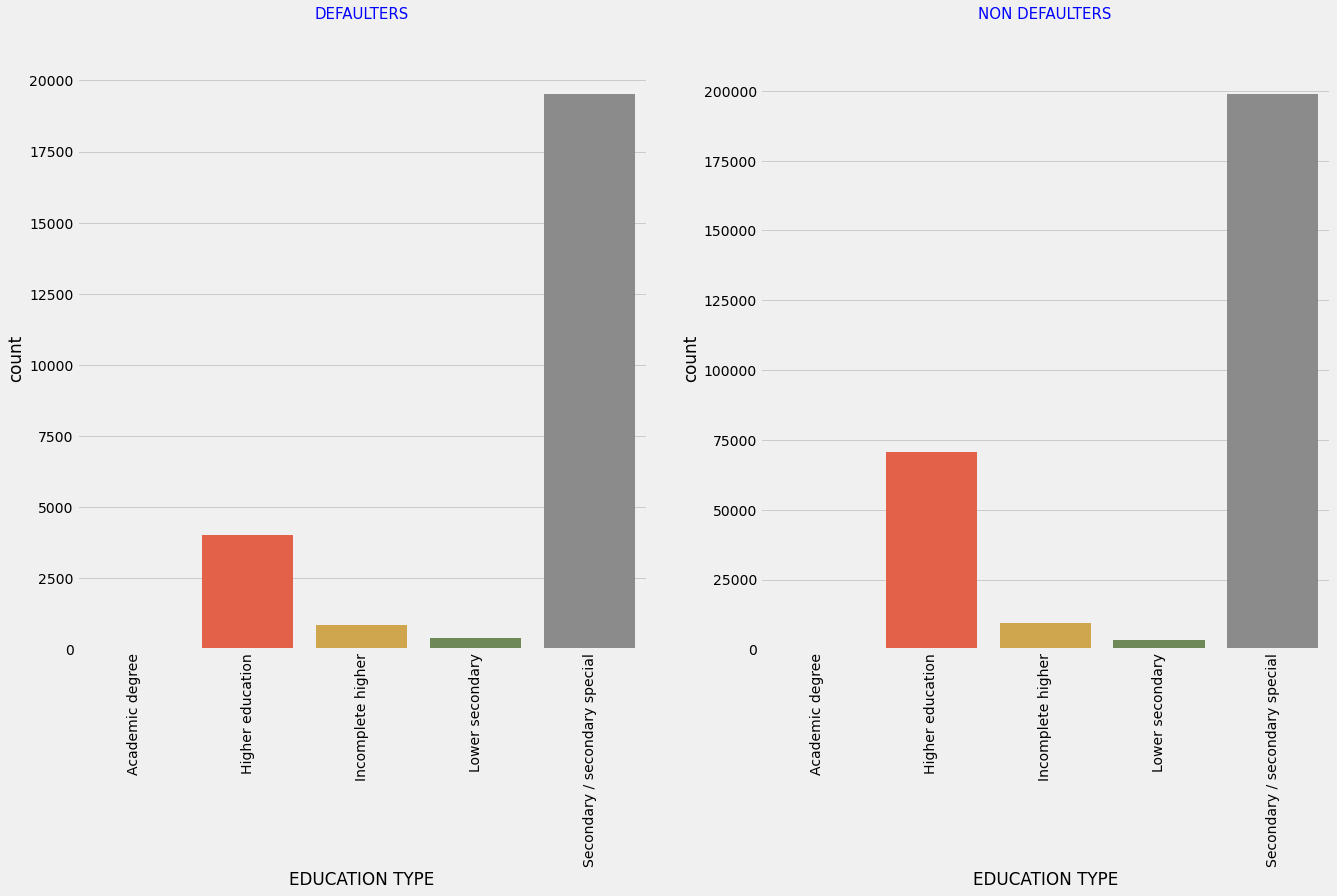

In [321]:
# Analyzing how repayment of loan is affected by education type

plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
sns.countplot(had_difficulties['NAME_EDUCATION_TYPE'])
plt.title('DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("EDUCATION TYPE")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(had_no_difficulties['NAME_EDUCATION_TYPE'])
plt.title('NON DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("EDUCATION TYPE")
plt.xticks(rotation=90)

plt.show()

Both cases seem to follow the same pattern where applicants who have completed Secondary/Secondary special have highest count followed by applicants with Higher education.

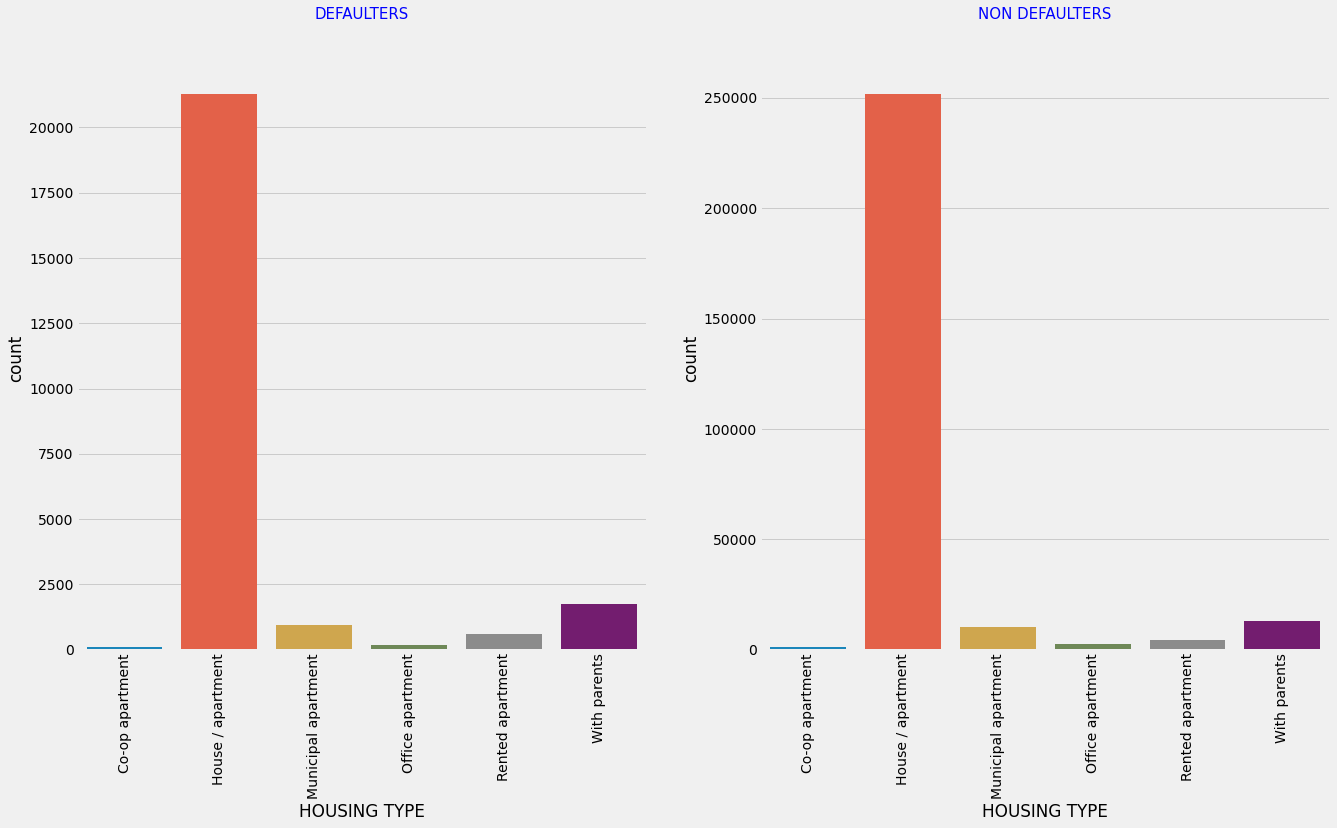

In [322]:
# Analyzing how repayment of loan is affected by housing type

plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
sns.countplot(had_difficulties['NAME_HOUSING_TYPE'])
plt.title('DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("HOUSING TYPE")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(had_no_difficulties['NAME_HOUSING_TYPE'])
plt.title('NON DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("HOUSING TYPE")
plt.xticks(rotation=90)

plt.show()

Both cases seem to follow the same pattern where most applicants live in House/apartment.

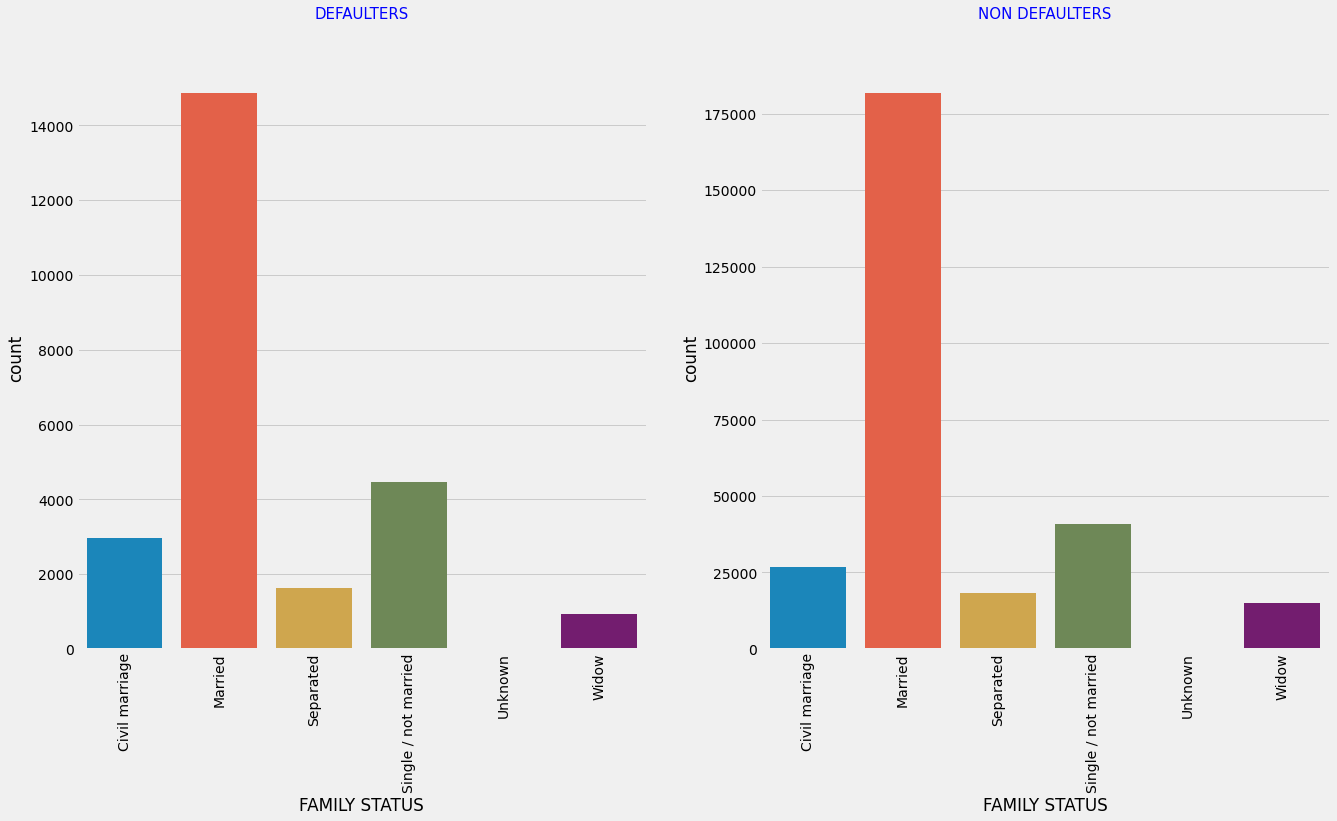

In [323]:
# Analyzing how repayment of loan is affected by family status

plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
sns.countplot(had_difficulties['NAME_FAMILY_STATUS'])
plt.title('DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("FAMILY STATUS")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(had_no_difficulties['NAME_FAMILY_STATUS'])
plt.title('NON DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("FAMILY STATUS")
plt.xticks(rotation=90)

plt.show()

Both cases seem to follow the same pattern where most applicants are married.

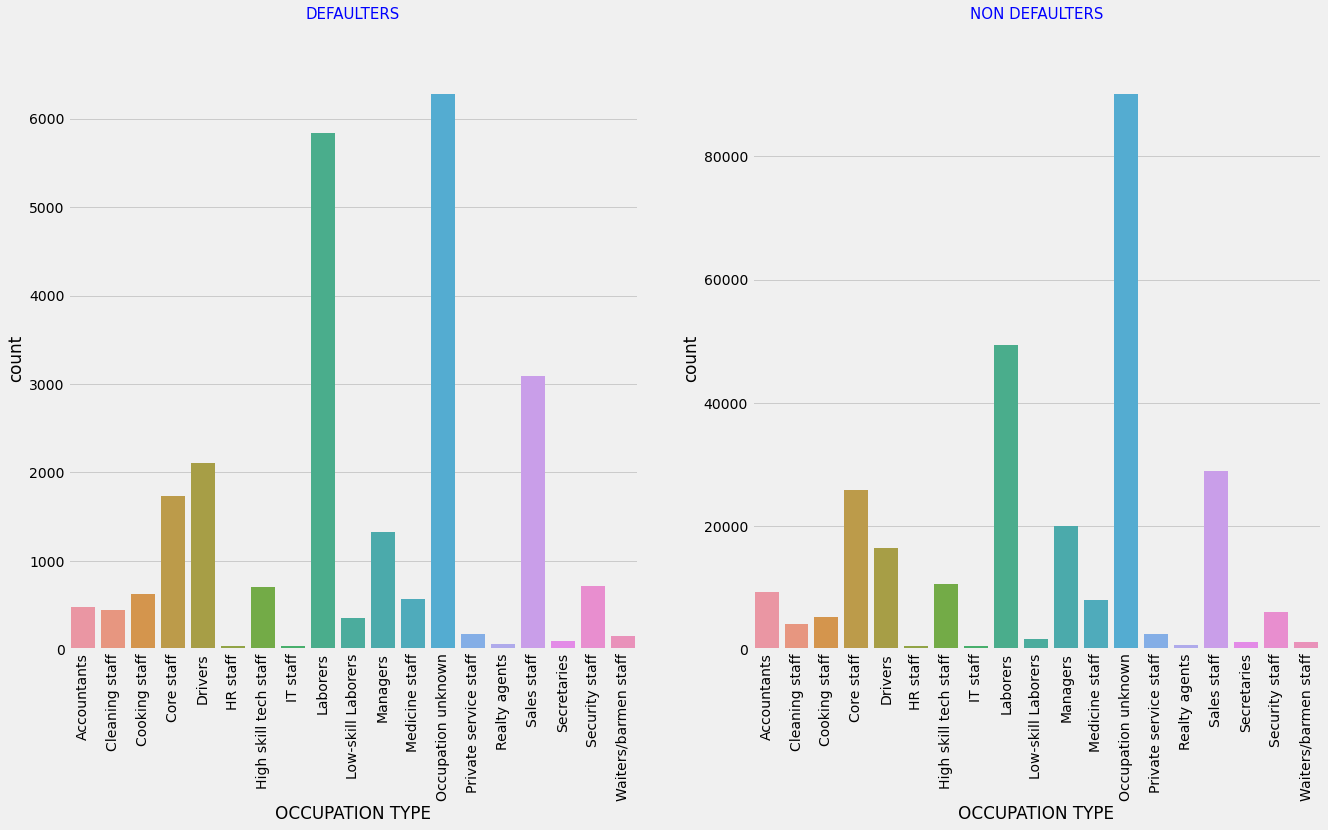

In [324]:
# Analyzing how repayment of loan is affected by occupation type

plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
sns.countplot(had_difficulties['OCCUPATION_TYPE'])
plt.title('DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("OCCUPATION TYPE")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(had_no_difficulties['OCCUPATION_TYPE'])
plt.title('NON DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("OCCUPATION TYPE")
plt.xticks(rotation=90)

plt.show()

In both defaulters and Non defaulters the occupation is unknown for a huge percentage of applicants.
For the applicants who have mentioned their occupation, we find that Laborers are most likely to default followed by Sales staff.

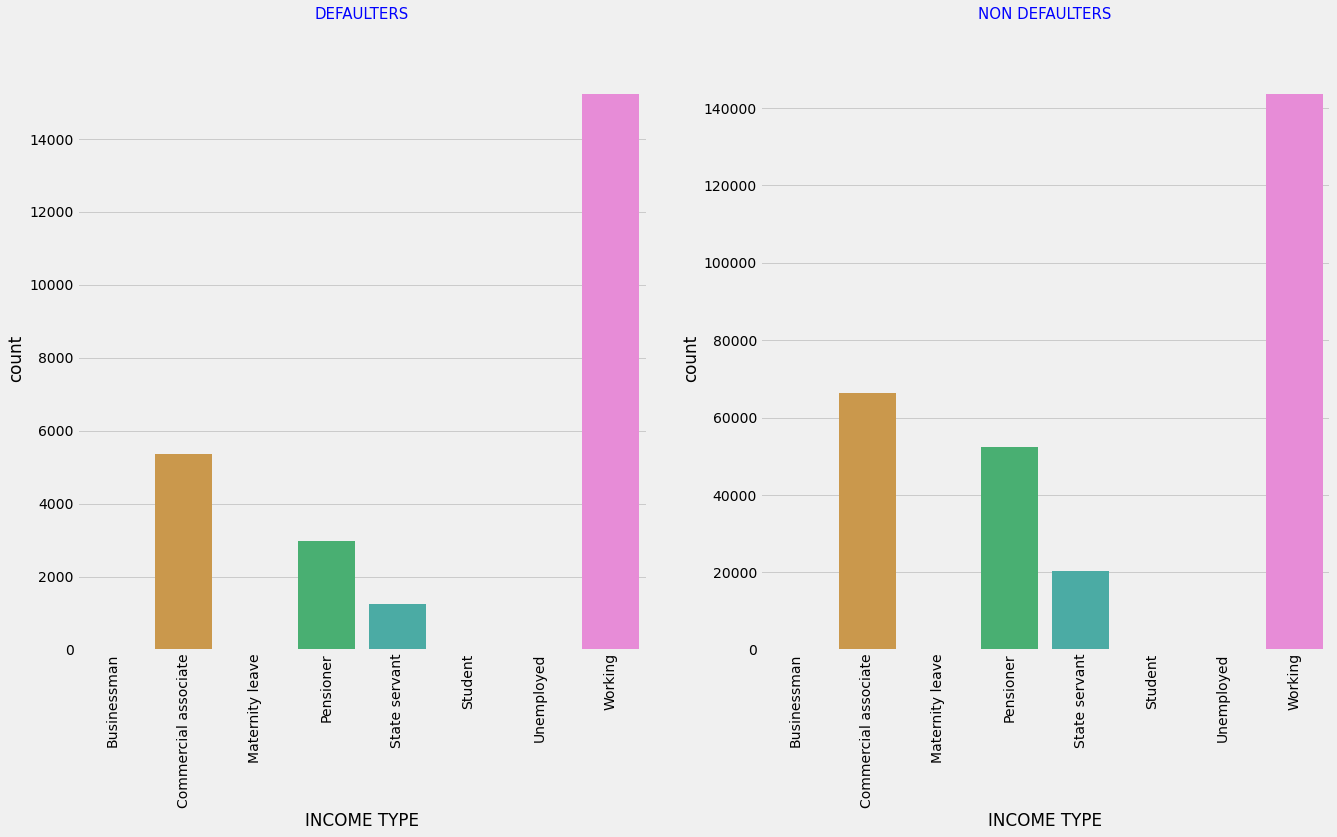

In [325]:
# Analyzing how repayment of loan is affected by income type

plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
sns.countplot(had_difficulties['NAME_INCOME_TYPE'])
plt.title('DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("INCOME TYPE")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(had_no_difficulties['NAME_INCOME_TYPE'])
plt.title('NON DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("INCOME TYPE")
plt.xticks(rotation=90)

plt.show()

Both cases seem to follow the same pattern where most applicants who are working have higher count in both defaulters and Non defaulters. 

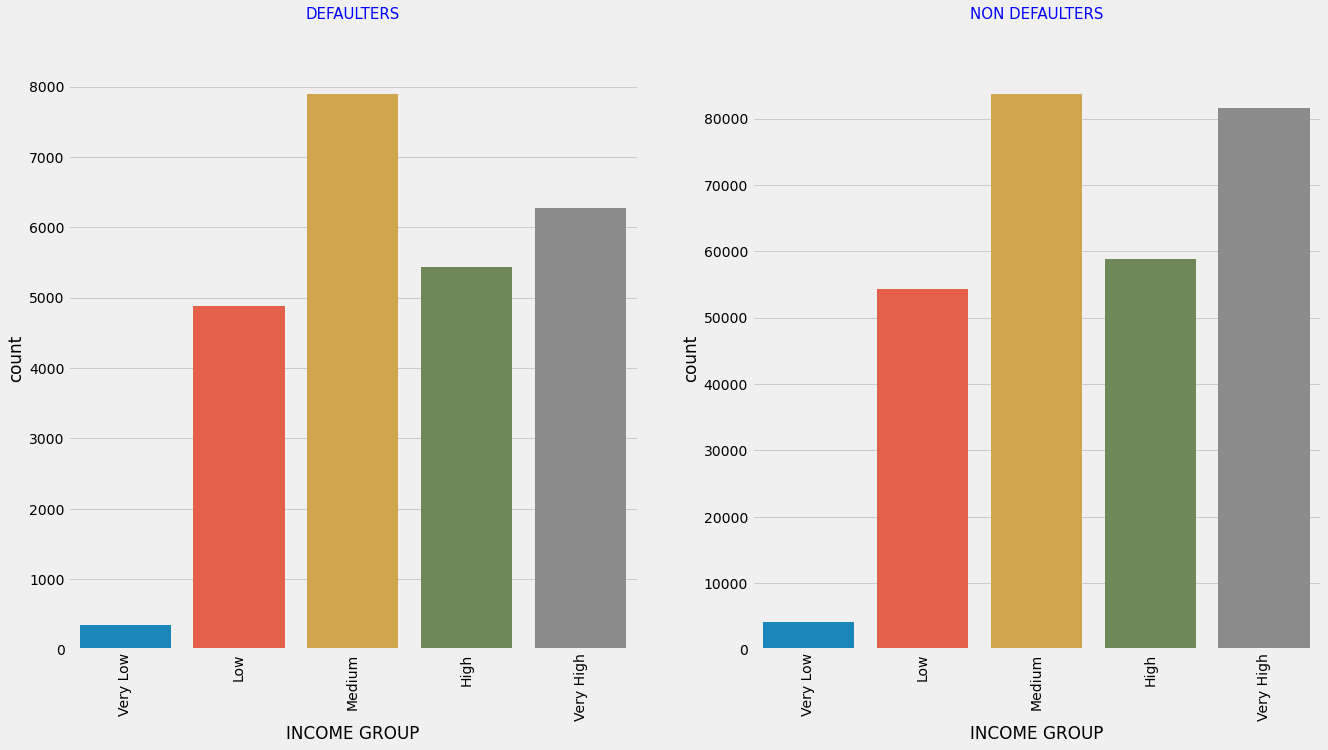

In [326]:
# Analyzing how repayment of loan is affected by income group

plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
sns.countplot(had_difficulties['AMT_INCOME_GROUP'])
plt.title('DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color': 'Blue'})
plt.xlabel("INCOME GROUP")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(had_no_difficulties['AMT_INCOME_GROUP'])
plt.title('NON DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color': 'Blue'})
plt.xlabel("INCOME GROUP")
plt.xticks(rotation=90)

plt.show()

We find that applicants in the Medium income group are the most to default than the applicants with very low income.

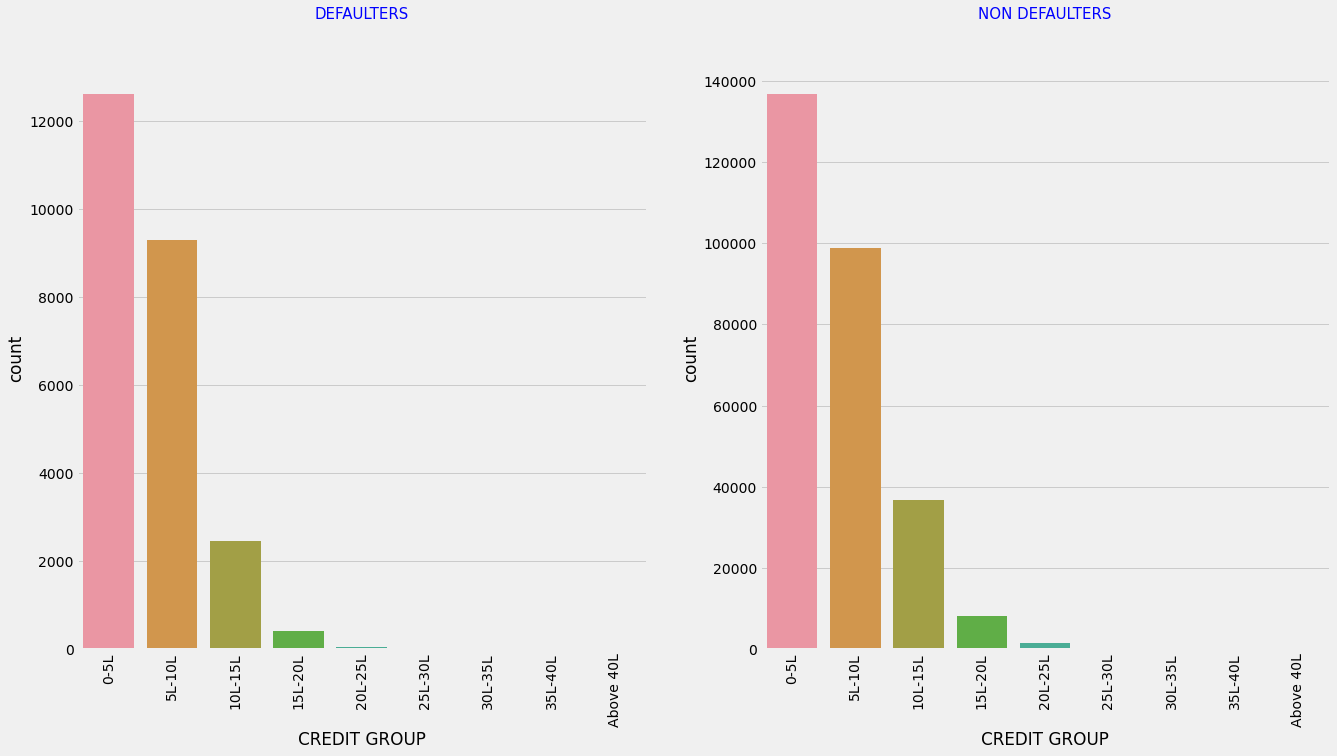

In [327]:
# Analyzing how repayment of loan is affected by credit amount group

plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
sns.countplot(had_difficulties['AMT_CREDIT_RANGE'])
plt.title('DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color': 'Blue'})
plt.xlabel("CREDIT GROUP")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(had_no_difficulties['AMT_CREDIT_RANGE'])
plt.title('NON DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color': 'Blue'})
plt.xlabel("CREDIT GROUP")
plt.xticks(rotation=90)

plt.show()

Applicants with credit amount 0-5 lakhs are the most to default.

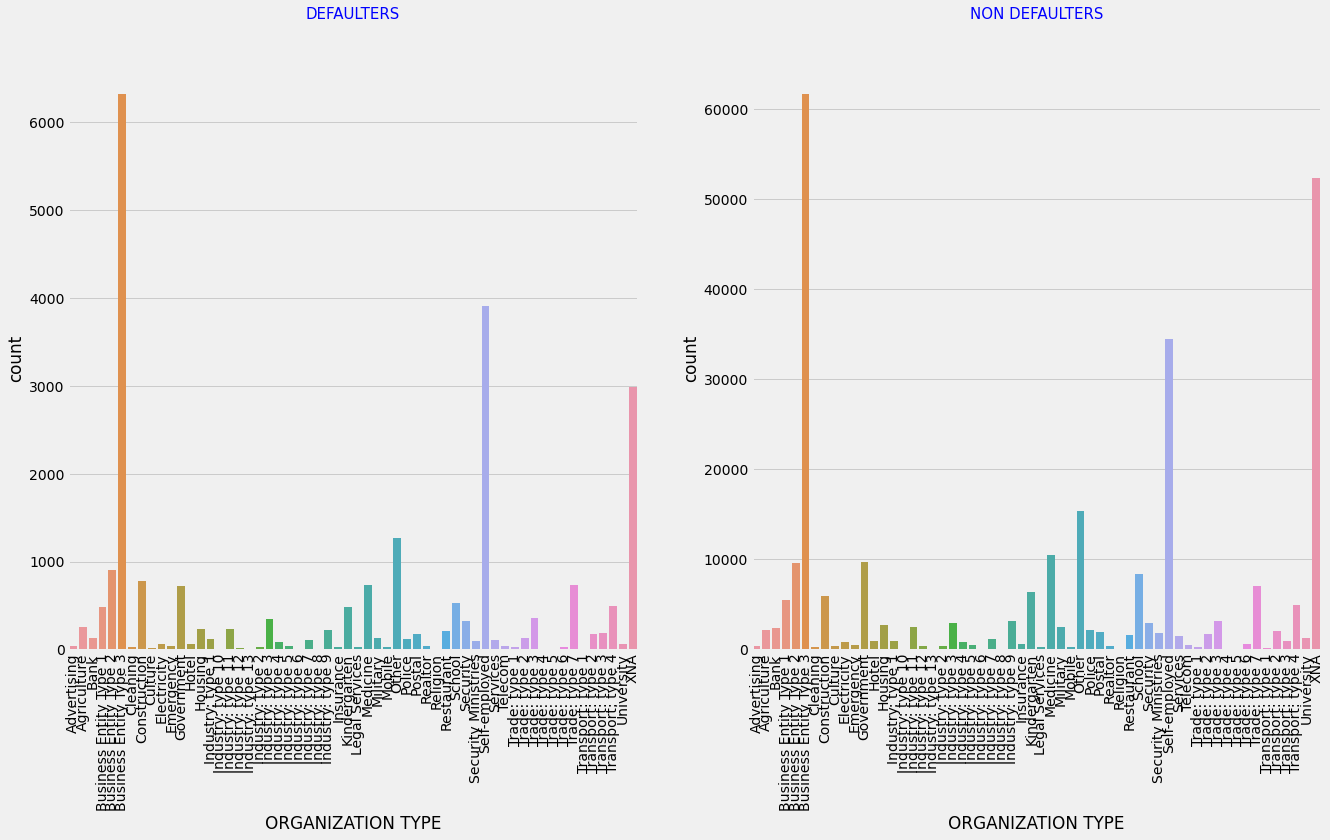

In [328]:
# Analyzing how repayment of loan is affected by organization type

plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
sns.countplot(had_difficulties['ORGANIZATION_TYPE'])
plt.title('DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("ORGANIZATION TYPE")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(had_no_difficulties['ORGANIZATION_TYPE'])
plt.title('NON DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("ORGANIZATION TYPE")
plt.xticks(rotation=90)


plt.show()

We find that applicants who are most likely to default are those who work in Business_Entity_Type 3 followed by those who are self-employed.

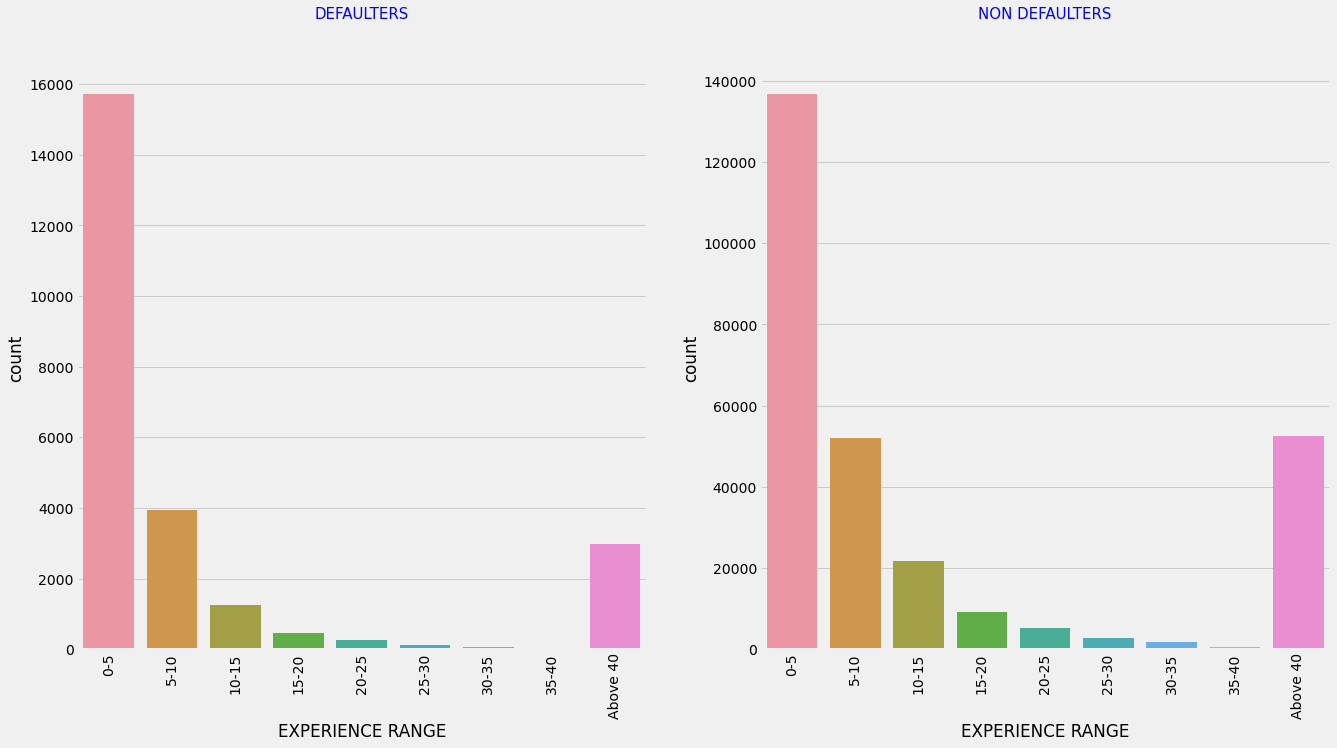

In [329]:
# Analyzing how repayment of loan is affected by Experience Range

plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
sns.countplot(had_difficulties['Experience_Range'])
plt.title('DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("EXPERIENCE RANGE")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(had_no_difficulties['Experience_Range'])
plt.title('NON DEFAULTERS\n', fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("EXPERIENCE RANGE")
plt.xticks(rotation=90)


plt.show()

Applicants who have less work experience in the range 0-5 years default more than applicants with more experience.

#### Univariate Analysis on numerical variables

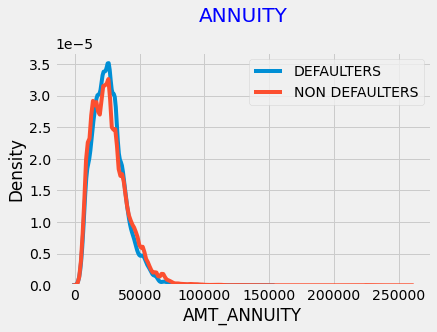

In [330]:
    # Analyzing AMT_ANNUITY
    sns.distplot(had_difficulties['AMT_ANNUITY'] , hist=False, label='DEFAULTERS')
    sns.distplot(had_no_difficulties['AMT_ANNUITY'] , hist=False, label='NON DEFAULTERS')
    plt.title("ANNUITY", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
    plt.xlabel("AMT_ANNUITY")
    plt.legend()
    plt.show()

Majority of applicants annuity amount is below 50000

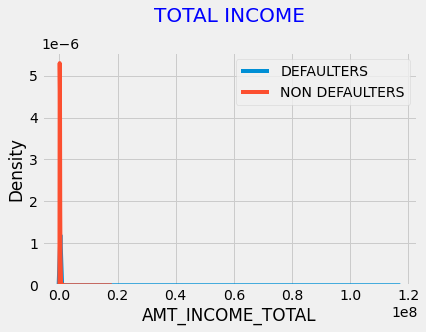

In [331]:
    # Analyzing AMT_INCOME_TOTAL
    sns.distplot(had_difficulties['AMT_INCOME_TOTAL'] , hist=False, label='DEFAULTERS')
    sns.distplot(had_no_difficulties['AMT_INCOME_TOTAL'] , hist=False, label='NON DEFAULTERS')
    plt.title("TOTAL INCOME", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
    plt.xlabel("AMT_INCOME_TOTAL")
    plt.legend()
    plt.show()

Most of the applicants are in the low income range.

#### Correlation

In [332]:
# Finding the top 10 correlation variables for defaulters

temp_had_difficulties=had_difficulties.drop(['YEARS_EMPLOYED','AGE'],axis=1)# since YEARS_EMPLOYED is same as DAYS_EMPLOYED and AGE is same as DAYS_BIRTH 
corr_def=temp_had_difficulties.corr()
corr_def_df = corr_def.where(np.triu(np.ones(corr_def.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_def_df.columns=['Col1','Col2','Corr_Value']
corr_def_df.dropna(subset=['Corr_Value'],inplace=True)
corr_def_df['Corr_Value'] = abs(corr_def_df['Corr_Value'])
corr_def_df = round(corr_def_df.sort_values(by=['Corr_Value'], ascending=False),2)
corr_def_df.head(10)

Col1                      Col2  Corr_Value
414  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE        1.00
128           AMT_GOODS_PRICE                AMT_CREDIT        0.98
276           CNT_FAM_MEMBERS              CNT_CHILDREN        0.89
440  DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE        0.87
129           AMT_GOODS_PRICE               AMT_ANNUITY        0.75
103               AMT_ANNUITY                AMT_CREDIT        0.75
207             DAYS_EMPLOYED                DAYS_BIRTH        0.58
415  OBS_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE        0.34
389  DEF_30_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE        0.33
232         DAYS_REGISTRATION                DAYS_BIRTH        0.29

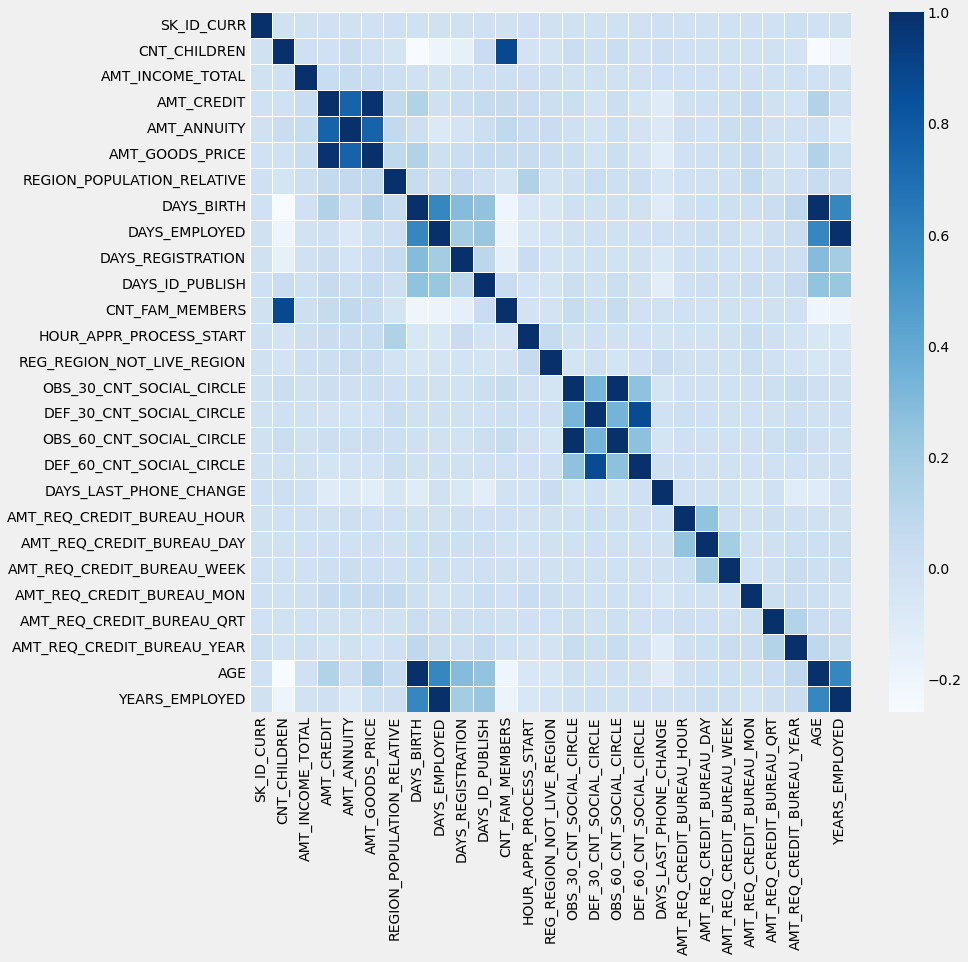

In [333]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(had_difficulties.corr(), cmap="Blues",annot=False,linewidth =1)

In [334]:
# Finding the top 10 correlation variables for non defaulters

temp_had_no_difficulties=had_no_difficulties.drop(['YEARS_EMPLOYED','AGE'],axis=1)# since YEARS_EMPLOYED is same as DAYS_EMPLOYED and AGE is same as DAYS_BIRTH 
corr_def=temp_had_no_difficulties.corr()
corr_def_df = corr_def.where(np.triu(np.ones(corr_def.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_def_df.columns=['Col1','Col2','Corr_Value']
corr_def_df.dropna(subset=['Corr_Value'],inplace=True)
corr_def_df['Corr_Value'] = abs(corr_def_df['Corr_Value'])
corr_def_df = round(corr_def_df.sort_values(by=['Corr_Value'], ascending=False),2)
corr_def_df.head(10)

Col1                      Col2  Corr_Value
414  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE        1.00
128           AMT_GOODS_PRICE                AMT_CREDIT        0.99
276           CNT_FAM_MEMBERS              CNT_CHILDREN        0.88
440  DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE        0.86
129           AMT_GOODS_PRICE               AMT_ANNUITY        0.78
103               AMT_ANNUITY                AMT_CREDIT        0.77
207             DAYS_EMPLOYED                DAYS_BIRTH        0.63
102               AMT_ANNUITY          AMT_INCOME_TOTAL        0.42
127           AMT_GOODS_PRICE          AMT_INCOME_TOTAL        0.35
77                 AMT_CREDIT          AMT_INCOME_TOTAL        0.34

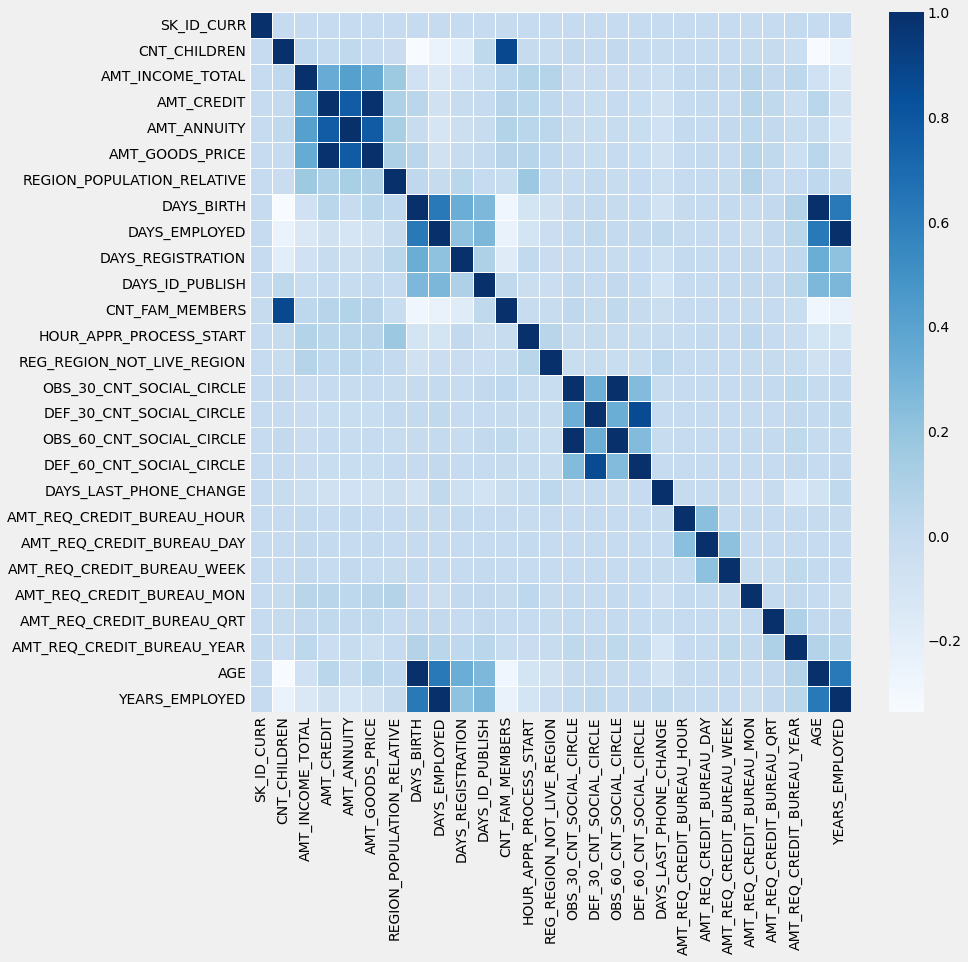

In [335]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(had_no_difficulties.corr(), cmap="Blues",annot=False,linewidth =1)

#### Bivariate Analysis

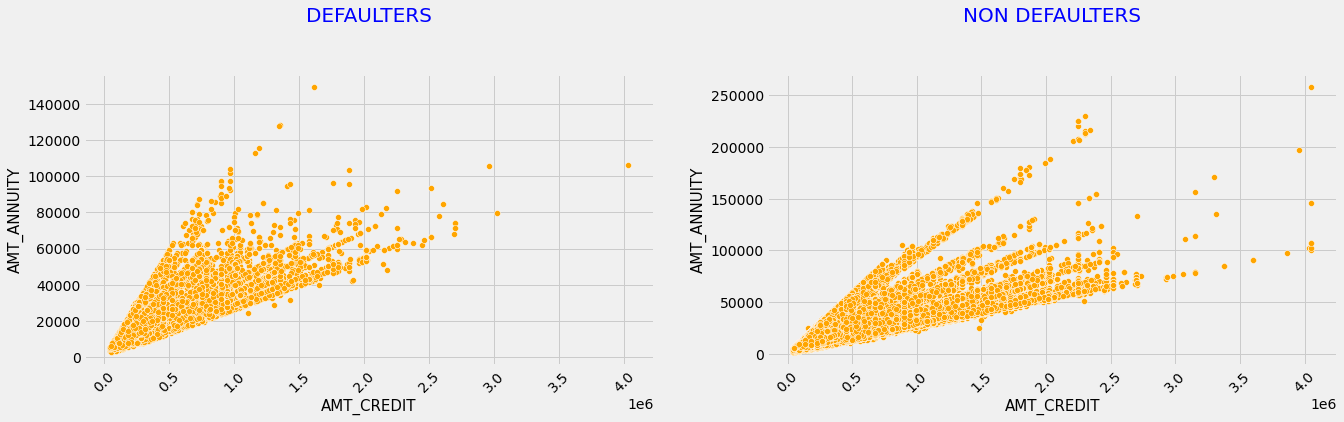

In [336]:
# AMT_CREDIT VS AMT_ANNUITY

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.title('DEFAULTERS\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
sns.scatterplot(data=had_difficulties, x='AMT_CREDIT',y='AMT_ANNUITY', color='Orange')
plt.xlabel('AMT_CREDIT', fontsize=15)
plt.ylabel('AMT_ANNUITY', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('NON DEFAULTERS\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
sns.scatterplot(data=had_no_difficulties, x='AMT_CREDIT',y='AMT_ANNUITY', color='Orange')
plt.xlabel('AMT_CREDIT', fontsize=15)
plt.ylabel('AMT_ANNUITY', fontsize=15)
plt.xticks(rotation=45)
    
plt.show()

Higher the loan amount credited, higher will be the annuity. Therefore AMT_CREDIT and AMT_ANNUITY are positively correlated.

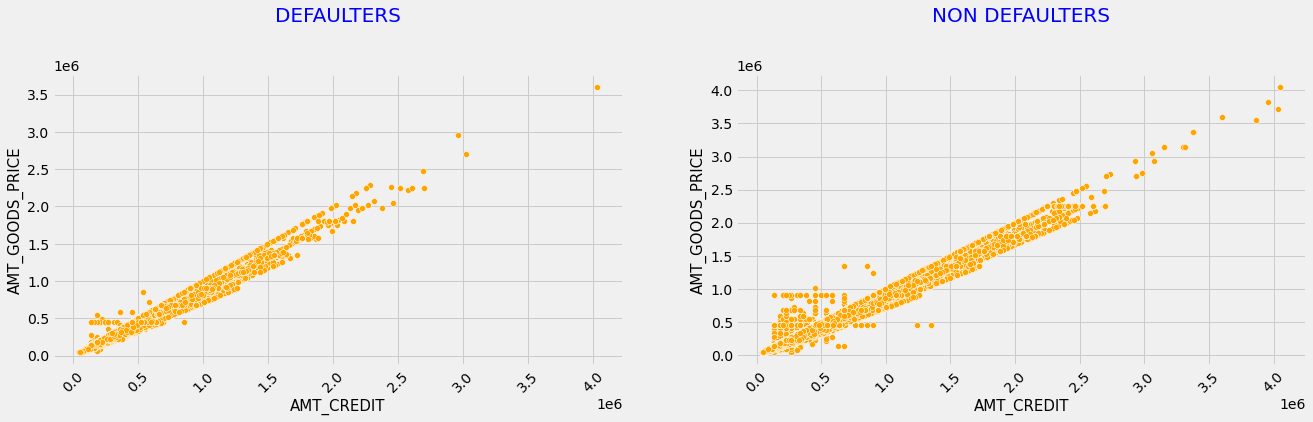

In [337]:
# AMT_CREDIT VS AMT_GOODS_PRICE

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.title('DEFAULTERS\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
sns.scatterplot(data=had_difficulties, x='AMT_CREDIT',y='AMT_GOODS_PRICE', color='Orange')
plt.xlabel('AMT_CREDIT', fontsize=15)
plt.ylabel('AMT_GOODS_PRICE', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('NON DEFAULTERS\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
sns.scatterplot(data=had_no_difficulties, x='AMT_CREDIT',y='AMT_GOODS_PRICE', color='Orange')
plt.xlabel('AMT_CREDIT', fontsize=15)
plt.ylabel('AMT_GOODS_PRICE', fontsize=15)
plt.xticks(rotation=45)
    
plt.show()

Higher the price of the goods, higher will be the loan amount. Therefore AMT_CREDIT and AMT_GOODS_PRICE are positively correlated.

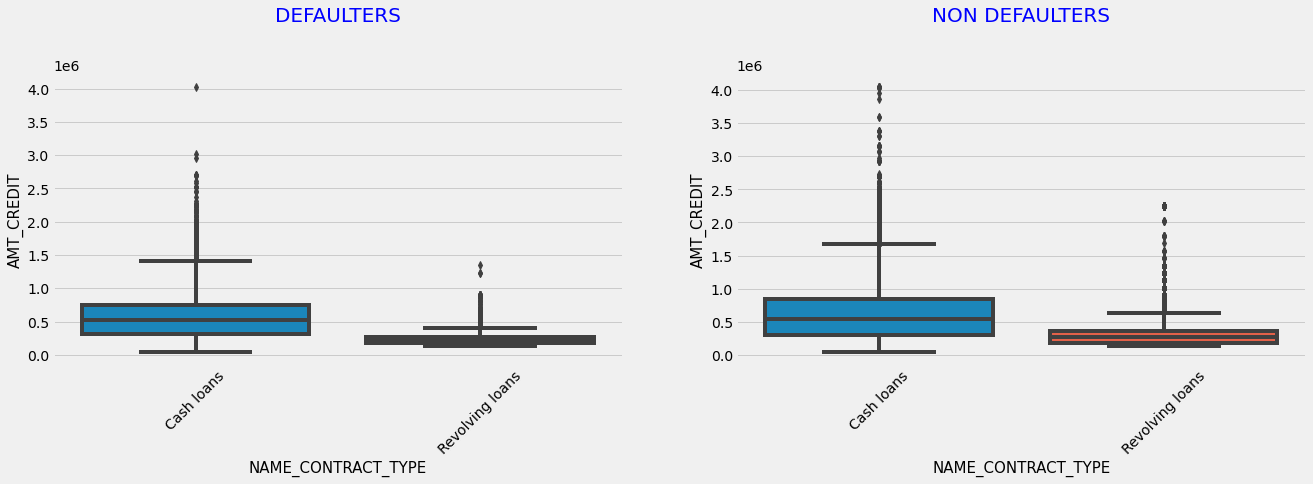

In [338]:
# AMT_CREDIT VS NAME_CONTRACT_TYPE

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.title('DEFAULTERS\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
sns.boxplot(x='NAME_CONTRACT_TYPE',y='AMT_CREDIT', data=had_difficulties)
plt.xlabel('NAME_CONTRACT_TYPE', fontsize=15)
plt.ylabel('AMT_CREDIT', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('NON DEFAULTERS\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
sns.boxplot(x='NAME_CONTRACT_TYPE',y='AMT_CREDIT', data=had_no_difficulties)
plt.xlabel('NAME_CONTRACT_TYPE', fontsize=15)
plt.ylabel('AMT_CREDIT', fontsize=15)
plt.xticks(rotation=45)
    
plt.show()

Cash loans have higher amount credited when compared to revolving loans.

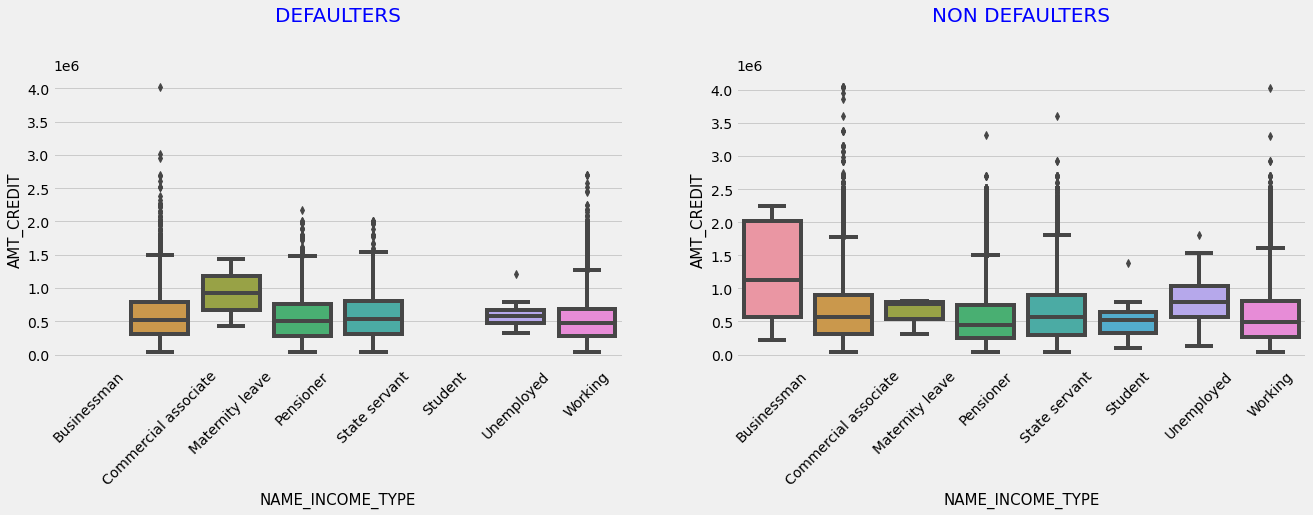

In [339]:
# AMT_CREDIT VS NAME_INCOME_TYPE

plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.title('DEFAULTERS\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
sns.boxplot(x='NAME_INCOME_TYPE',y='AMT_CREDIT', data=had_difficulties)
plt.xlabel('NAME_INCOME_TYPE', fontsize=15)
plt.ylabel('AMT_CREDIT', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('NON DEFAULTERS\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
sns.boxplot(x='NAME_INCOME_TYPE',y='AMT_CREDIT', data=had_no_difficulties)
plt.xlabel('NAME_INCOME_TYPE', fontsize=15)
plt.ylabel('AMT_CREDIT', fontsize=15)
plt.xticks(rotation=45)
    
plt.show()

Businessman have taken higher loan amounts and they do not seem to default the loan along with students.

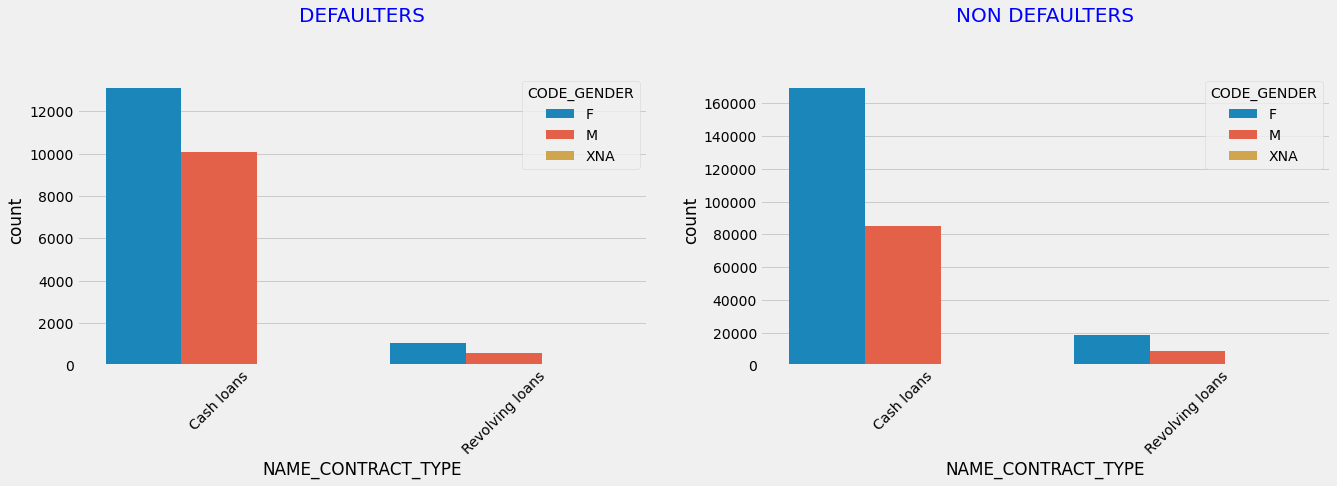

In [340]:
# NAME_CONTRACT_TYPE vs CODE_GENDER

plt.figure(figsize=[20,5])
    
plt.subplot(1,2,1)
plt.title('DEFAULTERS\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
sns.countplot(had_difficulties['NAME_CONTRACT_TYPE'], hue=had_difficulties['CODE_GENDER'])
plt.xlabel('NAME_CONTRACT_TYPE')
plt.xticks(rotation = 45)
plt.legend(title='CODE_GENDER', loc='upper right')

plt.subplot(1,2,2)
plt.title('NON DEFAULTERS\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
sns.countplot(had_no_difficulties['NAME_CONTRACT_TYPE'], hue=had_no_difficulties['CODE_GENDER'])
plt.xlabel('NAME_CONTRACT_TYPE')
plt.xticks(rotation = 45)
plt.legend(title='CODE_GENDER', loc='upper right')

plt.show()

Majority of the applicants are female and have taken cash loans.

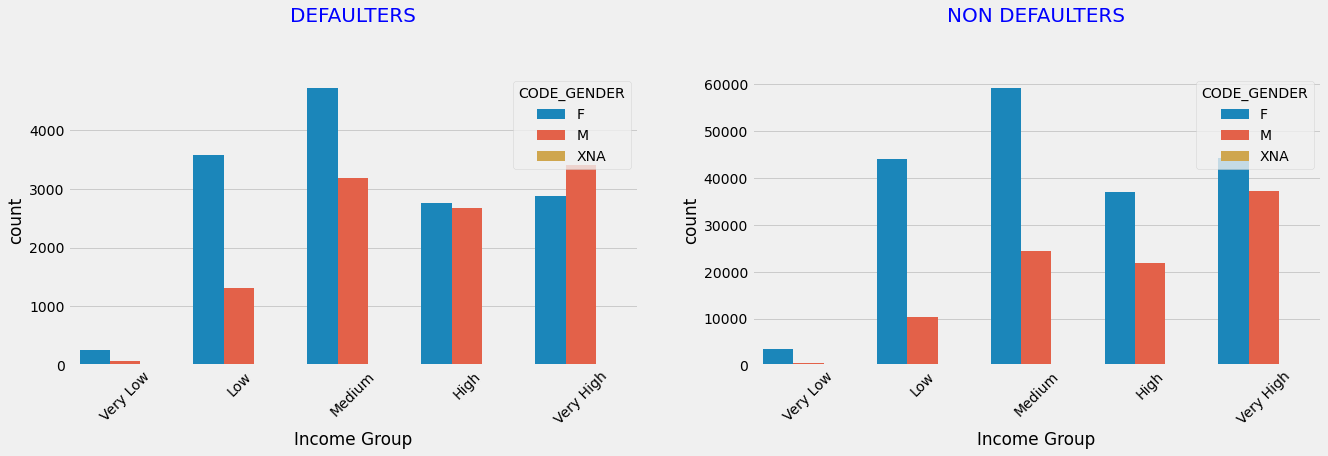

In [341]:
# AMT_INCOME_GROUP vs CODE_GENDER

plt.figure(figsize=[20,5])
    
plt.subplot(1,2,1)
plt.title('DEFAULTERS\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
sns.countplot(had_difficulties['AMT_INCOME_GROUP'], hue=had_difficulties['CODE_GENDER'])
plt.xlabel('Income Group')
plt.xticks(rotation = 45)
plt.legend(title='CODE_GENDER', loc='upper right')

plt.subplot(1,2,2)
plt.title('NON DEFAULTERS\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
sns.countplot(had_no_difficulties['AMT_INCOME_GROUP'], hue=had_no_difficulties['CODE_GENDER'])
plt.xlabel('Income Group')
plt.xticks(rotation = 45)
plt.legend(title='CODE_GENDER', loc='upper right')

plt.show()

Male applicants with very high income have defaulted more than female.

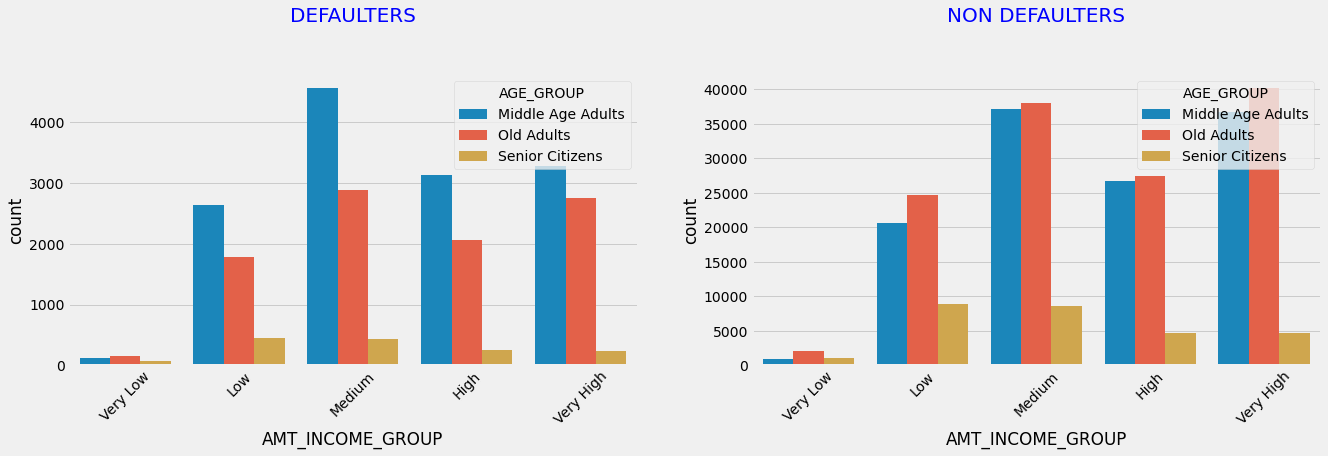

In [342]:
# AGE_GROUP vs AMT_INCOME_GROUP

plt.figure(figsize=[20,5])
    
plt.subplot(1,2,1)
plt.title('DEFAULTERS\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
sns.countplot(had_difficulties['AMT_INCOME_GROUP'], hue=had_difficulties['AGE_GROUP'])
plt.xlabel('AMT_INCOME_GROUP')
plt.xticks(rotation = 45)
plt.legend(title='AGE_GROUP', loc='upper right')

plt.subplot(1,2,2)
plt.title('NON DEFAULTERS\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
sns.countplot(had_no_difficulties['AMT_INCOME_GROUP'], hue=had_no_difficulties['AGE_GROUP'])
plt.xlabel('AMT_INCOME_GROUP')
plt.xticks(rotation = 45)
plt.legend(title='AGE_GROUP', loc='upper right')

plt.show()

Middle age adults belonging to medium income group is most defaulted.

### Merged data set

In [343]:
#merge both the dataframe on SK_ID_CURR with Inner Joins
merged_data = pd.merge(application_data, previous_application, how='inner', on='SK_ID_CURR')
merged_data.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002      1           Cash loans           M            N   
1      100003      0           Cash loans           F            N   
2      100003      0           Cash loans           F            N   
3      100003      0           Cash loans           F            N   
4      100004      0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  ...      NAME_PAYMENT_TYPE CODE_REJECT_REASON  \
0        24700.5  ...                    XNA                XAP   
1        35698.5  ...                    XNA                XAP   
2        35698.5  ...  Cash through the bank                XAP   
3        35698.5  ...  Cash through the bank                XAP   
4         6750.0  ...  Cash through the bank                XAP   

  NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              New              Vehicles            POS               XNA   
1         Repeater                   XNA           Cash            x-sell   
2        Refreshed             Furniture            POS               XNA   
3        Refreshed  Consumer Electronics            POS               XNA   
4              New                Mobile            POS               XNA   

              CHANNEL_TYPE  CNT_PAYMENT  NAME_YIELD_GROUP  \
0                    Stone         24.0        low_normal   
1  Credit and cash offices         12.0        low_normal   
2                    Stone          6.0            middle   
3             Country-wide         12.0            middle   
4         Regional / Local          4.0            middle   

           PRODUCT_COMBINATION  
0      POS other with interest  
1             Cash X-Sell: low  
2   POS industry with interest  
3  POS household with interest  
4  POS mobile without interest  

[5 rows x 70 columns]

In [344]:
# Rename the duplicated columns

merged_data = merged_data.rename({'NAME_CONTRACT_TYPE_y':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_ANNUITY_y':'AMT_ANNUITY_PREV',
                        'AMT_CREDIT_y':'AMT_CREDIT_PREV',
                         'AMT_GOODS_PRICE_y':'AMT_GOODS_PRICE_PREV',
                         'AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE_CURR',
                         'AMT_ANNUITY_x':'AMT_ANNUITY_CURR',
                         'AMT_CREDIT_x':'AMT_CREDIT_CURR',
                         'NAME_CONTRACT_TYPE_x':'NAME_CONTRACT_TYPE_CURR'}, axis=1)

In [345]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 70 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  category
 2   NAME_CONTRACT_TYPE_CURR      1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_CURR              1413701 non-null  float64 
 9   AMT_ANNUITY_CURR             1413701 non-null  float64 
 10  AMT_GOODS_PRICE_CURR         1413701 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  category
 12  NAME_INCOME_TYPE            

In [346]:
# Dividing the data into two based on the TARGET variable for comparative analysis

had_difficulties_merged=merged_data[merged_data['TARGET']==1]
had_no_difficulties_merged=merged_data[merged_data['TARGET']==0]

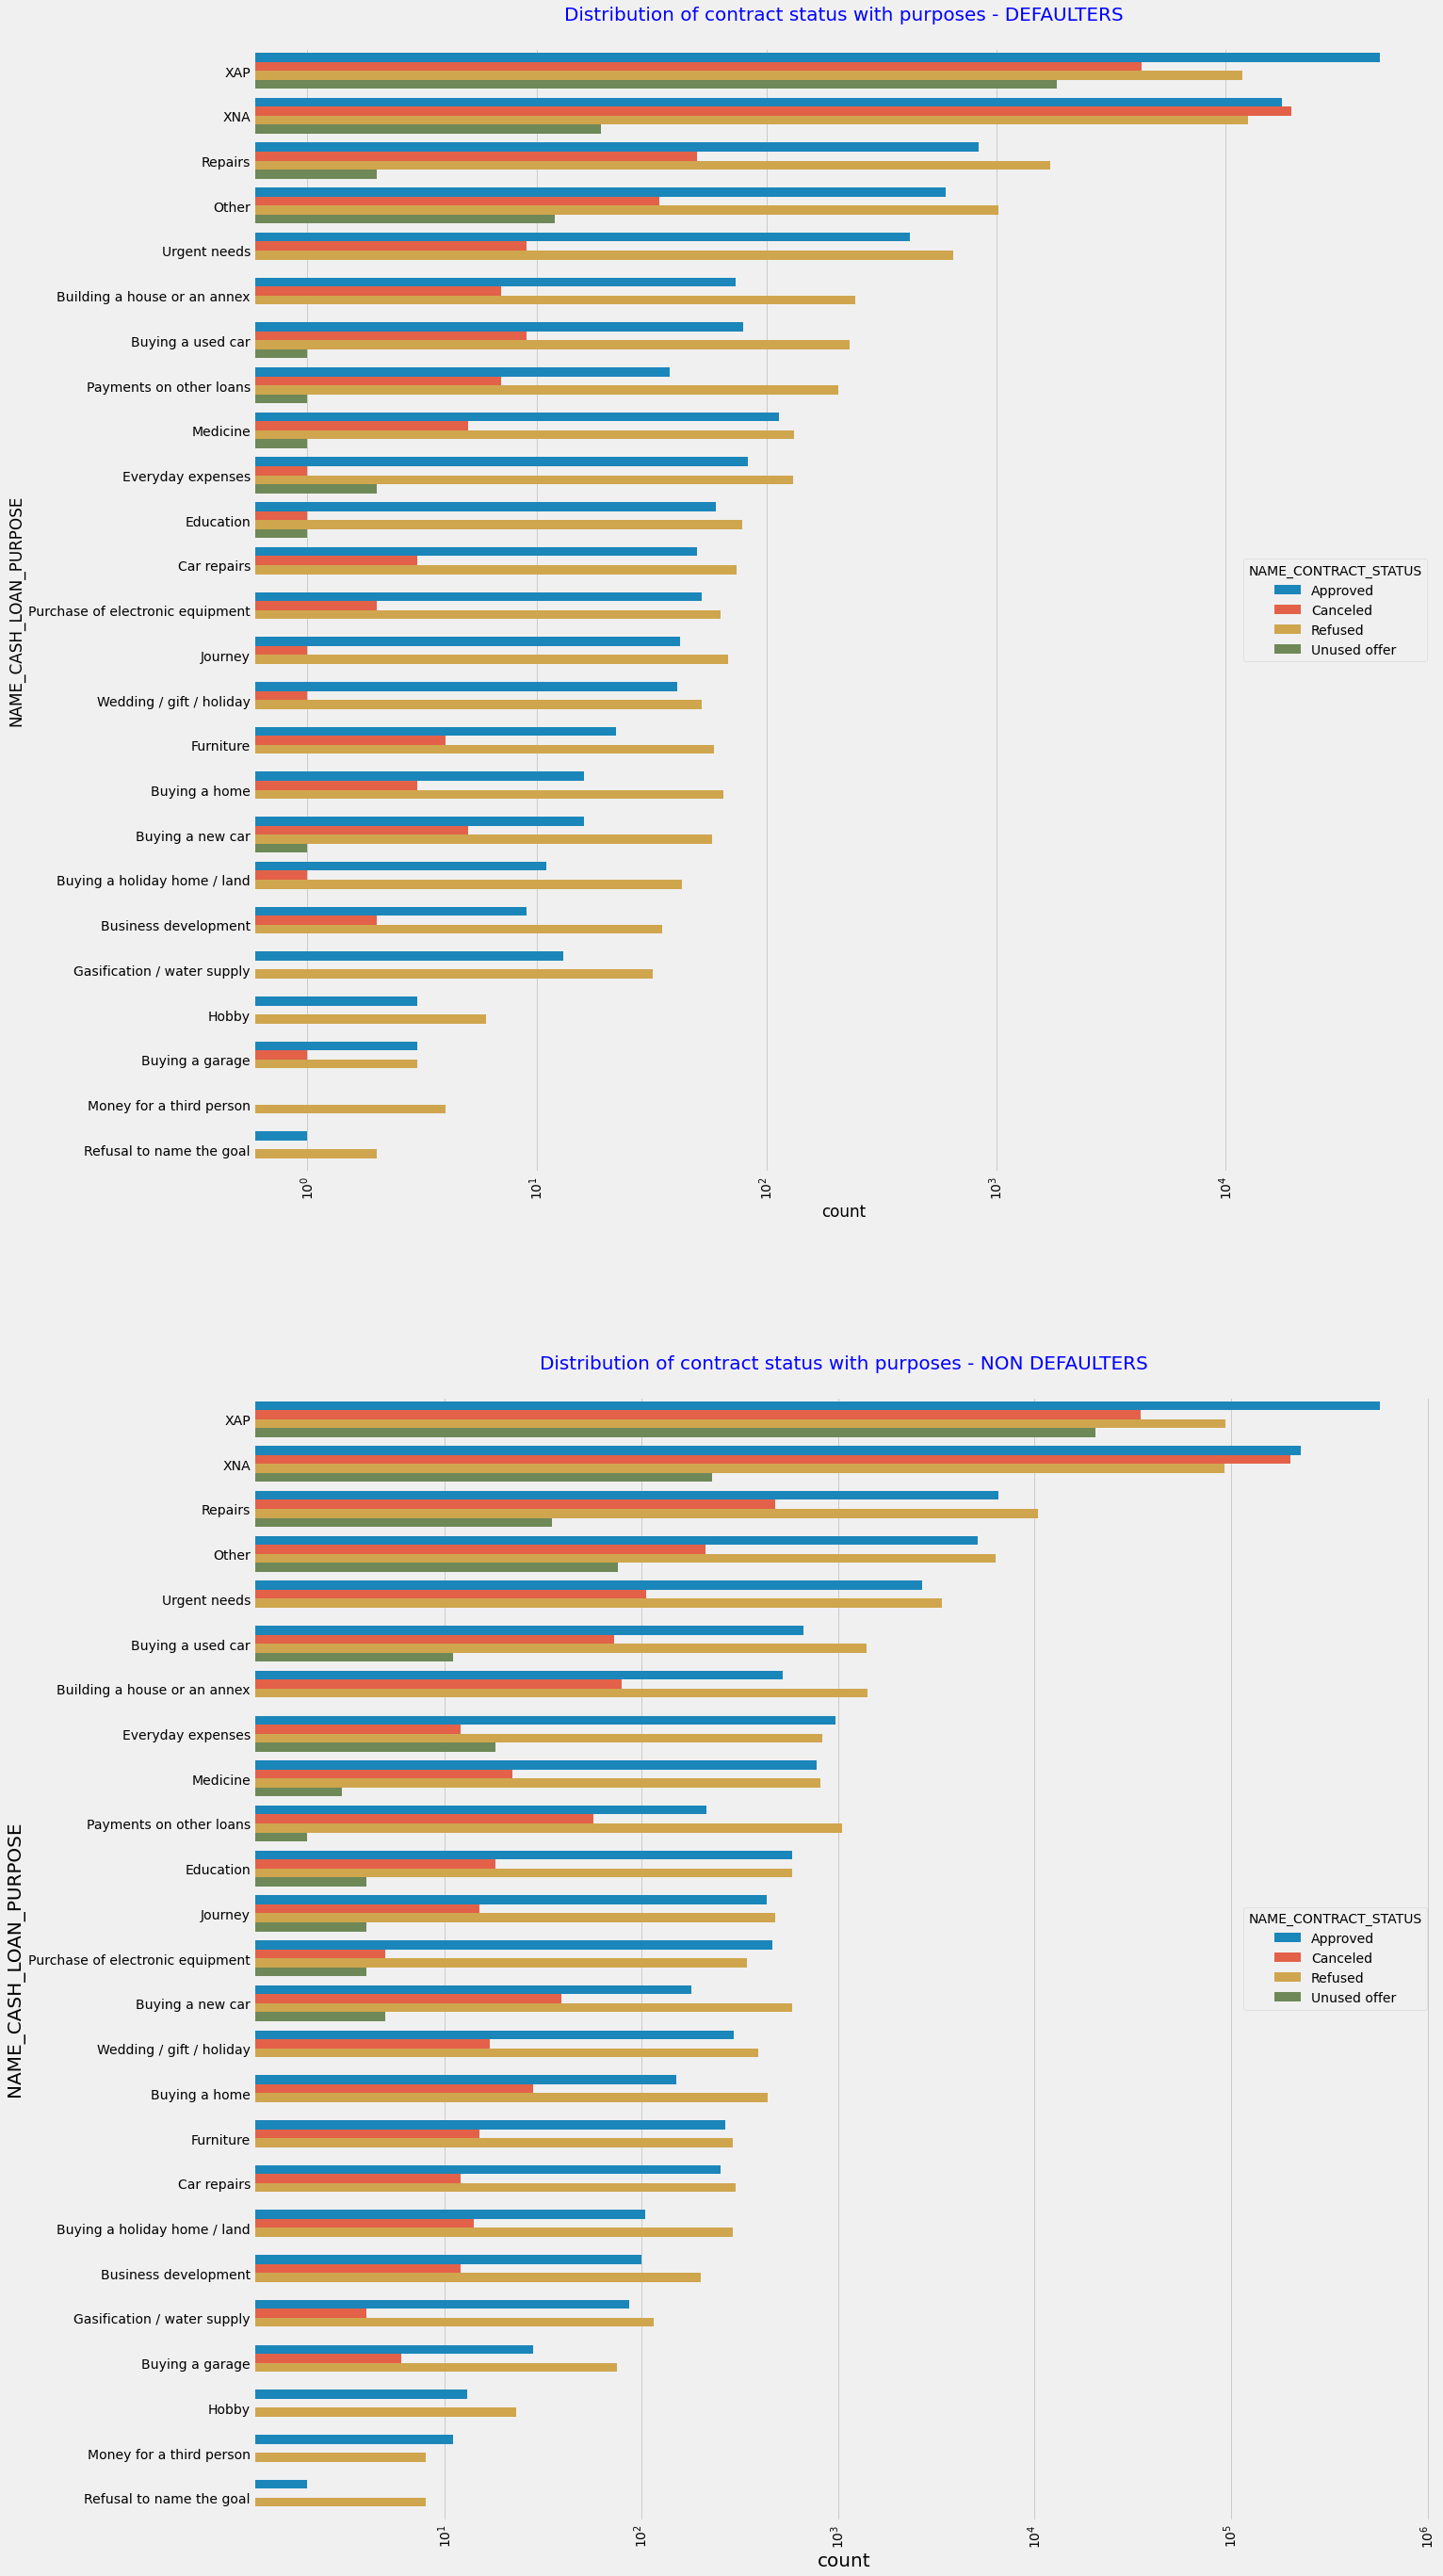

In [347]:
# Analyzing NAME_CASH_LOAN_PURPOSE and NAME_CONTRACT_STATUS w.r.t TARGET

plt.figure(figsize=[20,45])
    
plt.subplot(2,1,1)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes - DEFAULTERS', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
ax = sns.countplot(data =had_difficulties_merged , y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=had_difficulties_merged['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 

plt.subplot(2,1,2)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes - NON DEFAULTERS', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
ax = sns.countplot(data =had_no_difficulties_merged , y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=had_no_difficulties_merged['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')

plt.show()

Loan purpose has high number of unknown values (XAP, XNA).
Cash loans for repairs and urgent needs are more likely to default

## Conclusions and recommendations

1.	**Loan Type and Approval Rates:**
    <br>Focus on assessing risk associated with cash loans, which have a higher likelihood of refusal compared to consumer loans.  
    
2.	**Applicant Demographics:**
    <br> Middle-aged adults are more likely to default, while senior citizens default less. Consider age as a risk factor.
    <br>Male applicants with very high income default more than females and tailor risk assessment accordingly.
3.	**Income and Credit Amount:**
    <br> Medium income earners are prone to default, particularly those with credit amounts ranging from 0-5 lakhs.
4.	**Loan Purpose and Amount:**
    <br>Repairs and urgent needs loans have a higher default rate. Adjust loan terms or offer financial education for better management.
5.	**Correlations and Financial Indicators:**
    <br>Use the positive correlation between loan amounts, annuity, and income levels to assess loan affordability accurately.
6.	**Experience and Organization Type:**
    <br>Applicants with less experience and certain organization types are more likely to default. Incorporate this into risk assessment models.
7.	**Continuous Improvement:**
    <br>Continuously update risk assessment strategies based on evolving market conditions and borrower behavior.
    
<br>By applying these insights, the company can minimize defaults and optimize its loan portfolio. 
